In [2]:
from polygon import RESTClient

# Replace 'your_api_key' with your actual Polygon.io API key
api_key = "UVu97Jw0QqDcmCbK1EGwjXP2I9nhu3cJ"
client = RESTClient(api_key)

# Define parameters
ticker = "SPY"
expiration_date = "2025-01-08"  # Expiration date in YYYY-MM-DD format

# Fetch the option chain
options = client.list_options_contracts(
    underlying_ticker=ticker,
    #expiration_date=expiration_date
)

# Fetch the underlying price
#underlying_quote = client.get_last_quote(ticker)
#underlying_price = (underlying_quote.ask + underlying_quote.bid) / 2  # Midpoint price
underlying_price = 590
# Print the results
print(f"Underlying SPY Price: {underlying_price:.2f}")
print("\nOptions Chain:")
#for option in options:
    #print(f"Symbol: {option.ticker}, Expiration: {option.expiration_date}, Strike: {option.strike_price}")

Underlying SPY Price: 590.00

Options Chain:


In [3]:
from polygon import RESTClient
import datetime

# Replace with your Polygon.io API key
api_key = "your_api_key"
client = RESTClient(api_key)

def fetch_underlying_price(client, ticker, date):
    """Fetch the closing price of the underlying ticker for a given date."""
    try:
        aggs = client.get_aggs(
            ticker=ticker,
            multiplier=1,
            timespan="day",
            from_=date,
            to=date
        )
        if aggs and len(aggs) > 0:
            return aggs[0].close  # Close price of the underlying
        else:
            print(f"No underlying data for {ticker} on {date}")
            return None
    except Exception as e:
        print(f"Error fetching underlying price for {ticker} on {date}: {e}")
        return None

def generate_option_tickers(underlying, expiration, close_price, strike_inc, strike_range):
    """Generate option tickers for a given close price, expiration, and strike range."""
    strikes = range(
        int(close_price - strike_range),
        int(close_price + strike_range) + strike_inc,
        strike_inc
    )
    call_symbols = [f"O:{underlying}{expiration}C{strike * 1000:08d}" for strike in strikes]
    put_symbols = [f"O:{underlying}{expiration}P{strike * 1000:08d}" for strike in strikes]
    return call_symbols + put_symbols

def fetch_option_quotes(client, tickers, date):
    """Fetch all quotes for a list of option tickers."""
    all_quotes = []
    for ticker in tickers:
        try:
            # Use `get_quotes` to fetch all quotes for the ticker
            quotes = client.list_quotes(
                ticker=ticker,
                limit=5000,  # Adjust limit as necessary
                timestamp=date
            )
            for quote in quotes:
                all_quotes.append({
                    "ticker": ticker,
                    "bid_price": quote.bid_price,
                    "ask_price": quote.ask_price,
                    "timestamp": quote.timestamp
                })
        except Exception as e:
            print(f"Error fetching quotes for {ticker}: {e}")
    return all_quotes

# Parameters
underlying_ticker = "SPY"
expiration = "250108"  # Expiration date (YYMMDD format)
day_range = ["2025-01-01", "2025-01-08"]  # Date range for analysis
strike_inc = 5  # Strike increment in dollars
strike_range = 50  # Strike range around the underlying price in dollars

# Main Script
all_quotes = []

for day in day_range:
    print(f"Processing data for {day}...")
    close_price = fetch_underlying_price(client, underlying_ticker, day)
    
    if close_price is not None:
        # Generate option tickers
        option_tickers = generate_option_tickers(
            underlying=underlying_ticker,
            expiration=expiration,
            close_price=close_price,
            strike_inc=strike_inc,
            strike_range=strike_range
        )
        
        # Fetch all quotes for the generated tickers
        quotes = fetch_option_quotes(client, option_tickers, day)
        all_quotes.extend(quotes)

        print(f"Fetched {len(quotes)} quotes for {day}.")

# Print all fetched quotes
for quote in all_quotes:
    print(f"Ticker: {quote['ticker']}, Bid: {quote['bid_price']}, Ask: {quote['ask_price']}, Time: {quote['timestamp']}")

print(f"Total quotes fetched: {len(all_quotes)}")

Processing data for 2025-01-01...
Error fetching underlying price for SPY on 2025-01-01: {"status":"ERROR","request_id":"8c773051e5dce5ad97c71d24332912fe","error":"Unknown API Key"}
Processing data for 2025-01-08...
Error fetching underlying price for SPY on 2025-01-08: {"status":"ERROR","request_id":"66e792df4f013ece47f86df8dbd96e7a","error":"Unknown API Key"}
Total quotes fetched: 0


In [5]:
def create_polygon_symbol(ticker, maturity, strike, option_type):
    """
    Create a Polygon symbol for an option.

    Parameters:
    ticker (str): The ticker symbol of the underlying asset.
    maturity (str): The expiration date of the option in YYYY-MM-DD format.
    strike (float): The strike price of the option.
    option_type (str): The type of the option ('C' for call, 'P' for put).

    Returns:
    str: The Polygon symbol for the option.
    """
    # Convert maturity date to YYMMDD format
    maturity_formatted = maturity[2:].replace("-", "")
    
    # Format the strike price to 8 digits with leading zeros
    strike_formatted = f"{int(strike * 1000):08d}"
    
    # Create the Polygon symbol
    polygon_symbol = f"O:{ticker}{maturity_formatted}{option_type}{strike_formatted}"
    
    return polygon_symbol

# Example usage
ticker = "SPY"
maturity = "2025-01-08"
strike = 610
option_type = "P"  # 'C' for call, 'P' for put
polygon_symbol = create_polygon_symbol(ticker, maturity, strike, option_type)
print(polygon_symbol)

O:SPY250108P00610000


In [7]:
from polygon import RESTClient
import datetime

# Replace with your Polygon.io API key
api_key = "your_api_key"
api_key = "UVu97Jw0QqDcmCbK1EGwjXP2I9nhu3cJ"
client = RESTClient(api_key)

def fetch_underlying_price(client, ticker, date):
    """Fetch the closing price of the underlying ticker for a given date."""
    try:
        aggs = client.get_aggs(
            ticker=ticker,
            multiplier=1,
            timespan="day",
            from_=date,
            to=date
        )
        if aggs and len(aggs) > 0:
            return aggs[0].close  # Close price of the underlying
        else:
            print(f"No underlying data for {ticker} on {date}")
            return None
    except Exception as e:
        print(f"Error fetching underlying price for {ticker} on {date}: {e}")
        return None

def generate_option_tickers(underlying, expiration, close_price, strike_inc, strike_range):
    """Generate option tickers for a given close price, expiration, and strike range."""
    strikes = range(
        int(close_price - strike_range),
        int(close_price + strike_range) + strike_inc,
        strike_inc
    )
    call_symbols = [f"O:{underlying}{expiration}C{strike * 1000:08d}" for strike in strikes]
    put_symbols = [f"O:{underlying}{expiration}P{strike * 1000:08d}" for strike in strikes]
    return call_symbols + put_symbols

def fetch_option_quotes(client, tickers, date):
    """Fetch all quotes for a list of option tickers."""
    all_quotes = []
    for ticker in tickers:
        try:
            # Use `list_quotes` to fetch all quotes for the ticker
            quotes = client.list_quotes(
                ticker=ticker,
                limit=5000,  # Adjust limit as necessary
                timestamp=date
            )
            for quote in quotes:
                all_quotes.append({
                    "ticker": ticker,
                    "bid_price": quote.bid_price,
                    "ask_price": quote.ask_price,
                    "bid_size": quote.bid_size,
                    "ask_size": quote.ask_size,
                    "bid_exchange": quote.bid_exchange,
                    "ask_exchange": quote.ask_exchange,
                    "sequence_number": quote.sequence_number,
                    "timestamp": quote.sip_timestamp
                })
        except Exception as e:
            print(f"Error fetching quotes for {ticker}: {e}")
    return all_quotes

# Parameters
underlying_ticker = "SPY"
expiration = "250108"  # Expiration date (YYMMDD format)
day_range = ["2025-01-01", "2025-01-08"]  # Date range for analysis
strike_inc = 5  # Strike increment in dollars
strike_range = 50  # Strike range around the underlying price in dollars

# Main Script
all_quotes = []

for day in day_range:
    print(f"Processing data for {day}...")
    close_price = fetch_underlying_price(client, underlying_ticker, day)
    
    if close_price is not None:
        print(f"Underlying close price on {day}: {close_price}")
        
        # Generate option tickers
        option_tickers = generate_option_tickers(
            underlying=underlying_ticker,
            expiration=expiration,
            close_price=close_price,
            strike_inc=strike_inc,
            strike_range=strike_range
        )
        
        # Fetch all quotes for the generated tickers
        quotes = fetch_option_quotes(client, option_tickers, day)
        all_quotes.extend(quotes)

        print(f"Fetched {len(quotes)} quotes for {day}.")

# Print all fetched quotes
#for quote in all_quotes:
    #print(f"Ticker: {quote['ticker']}, Bid: {quote['bid_price']}, Ask: {quote['ask_price']}, Time: {quote['timestamp']}")

print(f"Total quotes fetched: {len(all_quotes)}")

Processing data for 2025-01-01...
No underlying data for SPY on 2025-01-01
Processing data for 2025-01-08...
Underlying close price on 2025-01-08: 589.49
Fetched 1268533 quotes for 2025-01-08.
Total quotes fetched: 1268533


In [8]:
quotes
import pandas as pd
pd.DataFrame(quotes)
pd.DataFrame(quotes).to_csv("quotes.csv", index=False)


In [9]:
from datetime import datetime, timezone

def convert_sip_timestamp_to_datetime(sip_timestamp):
    """
    Convert SIP Unix Timestamp (nanoseconds) to a human-readable datetime.
    
    Parameters:
        sip_timestamp (int): SIP Unix Timestamp in nanoseconds.
    
    Returns:
        datetime: Datetime object in UTC.
    """
    # Convert nanoseconds to seconds
    seconds = sip_timestamp / 1_000_000_000
    # Convert to a datetime object
    return datetime.fromtimestamp(seconds, tz=timezone.utc)

# Example SIP Unix Timestamp
sip_timestamp = 1672617600000000000  # Replace with your SIP timestamp
converted_datetime = convert_sip_timestamp_to_datetime(sip_timestamp)

print(f"SIP Timestamp: {sip_timestamp}")
print(f"Converted Datetime: {converted_datetime}")

SIP Timestamp: 1672617600000000000
Converted Datetime: 2023-01-02 00:00:00+00:00


In [10]:
df=pd.DataFrame(quotes)

In [11]:
dt_times = df['timestamp'].apply(convert_sip_timestamp_to_datetime)
df['timestamp2'] = dt_times
max(df['timestamp2'])
min(df['timestamp2'])

Timestamp('2025-01-08 14:30:00.003617+0000', tz='UTC')

In [13]:
import pytz
eastern_tz = pytz.timezone("US/Eastern")
# Convert UTC to US Eastern Time
df_times2= df['timestamp2'].apply(lambda x: x.astimezone(eastern_tz))
df['timestamp3'] = df_times2
min(df['timestamp3'])
df.to_csv("quotes.csv", index=False)

In [1]:
import pandas as pd

def generate_nbbo(df):
    """
    Generate NBBO (National Best Bid and Offer) feed for each ticker individually.
    Ensures quotes are only valid until replaced by a newer quote from the same exchange.
    Stores exchange information for best bid and ask.
    """
    # Sort data by ticker and timestamp
    df = df.sort_values(by=["ticker", "timestamp_est"]).reset_index(drop=True)

    # Store final NBBO output
    nbbo_feed = []

    # Process each ticker separately
    for ticker, ticker_df in df.groupby("ticker"):
        # Tracking best bid/ask per exchange
        bid_quotes = {}  # {exchange: {price, size}}
        ask_quotes = {}  # {exchange: {price, size}}

        # Initialize best bid and ask
        best_bid = None
        best_ask = None

        # Process each row for the current ticker
        for _, row in ticker_df.iterrows():
            exchange_bid = row["bid_exchange"]
            exchange_ask = row["ask_exchange"]
            bid_price = row["bid_price"]
            ask_price = row["ask_price"]
            bid_size = row["bid_size"]
            ask_size = row["ask_size"]
            timestamp = row["timestamp_est"]

            # Update bid quotes per exchange
            bid_quotes[exchange_bid] = {"price": bid_price, "size": bid_size}
            ask_quotes[exchange_ask] = {"price": ask_price, "size": ask_size}

            # Determine best bid
            if bid_quotes:
                best_bid_exchange, best_bid = max(bid_quotes.items(), key=lambda x: x[1]["price"])
            else:
                best_bid_exchange, best_bid = None, None

            # Determine best ask
            if ask_quotes:
                best_ask_exchange, best_ask = min(ask_quotes.items(), key=lambda x: x[1]["price"])
            else:
                best_ask_exchange, best_ask = None, None

            # Store NBBO only if both bid and ask exist
            if best_bid and best_ask:
                nbbo_feed.append({
                    "timestamp_est": timestamp,
                    "ticker": ticker,
                    "best_bid_price": best_bid["price"],
                    "best_bid_size": best_bid["size"],
                    "best_bid_exchange": best_bid_exchange,
                    "best_ask_price": best_ask["price"],
                    "best_ask_size": best_ask["size"],
                    "best_ask_exchange": best_ask_exchange
                })

    # Convert to DataFrame
    nbbo_df = pd.DataFrame(nbbo_feed)
    return nbbo_df

# Load input CSV
df = pd.read_csv("quotes.csv")

# Generate NBBO feed
nbbo_df = generate_nbbo(df)

# Save NBBO feed
nbbo_df.to_csv("nbbo_feed.csv", index=False)


ModuleNotFoundError: No module named 'ace_tools'

In [3]:
import pandas as pd

# Load NBBO feed data
df = pd.read_csv("nbbo_feed.csv")

# Convert timestamp to datetime format
df["timestamp_est"] = pd.to_datetime(df["timestamp_est"])

# Round timestamps to the nearest minute
df["minute"] = df["timestamp_est"].dt.floor("T")  # 'T' stands for minute

# Group by ticker and minute
snapshot_df = df.groupby(["ticker", "minute"]).agg(
    best_bid_price=("best_bid_price", "last"),  # Last bid price of the minute
    best_bid_size=("best_bid_size", "last"),    # Last bid size
    best_bid_exchange=("best_bid_exchange", "last"),  # Exchange providing last bid
    best_ask_price=("best_ask_price", "last"),  # Last ask price of the minute
    best_ask_size=("best_ask_size", "last"),    # Last ask size
    best_ask_exchange=("best_ask_exchange", "last")  # Exchange providing last ask
).reset_index()

# Save to CSV
snapshot_df.to_csv("nbbo_1min_snapshot.csv", index=False)

In [2]:
import pandas as pd
df=pd.read_csv("merged_data/merged_opt_1m_2025-01-02.csv")

In [114]:
tickers=df['ticker'].unique()

groups=df.groupby('ticker')
df1=groups.get_group(tickers[19])


In [115]:
tickers

array(['O:SPY250102C00554000', 'O:SPY250102C00559000',
       'O:SPY250102C00564000', 'O:SPY250102C00569000',
       'O:SPY250102C00574000', 'O:SPY250102C00579000',
       'O:SPY250102C00584000', 'O:SPY250102C00589000',
       'O:SPY250102C00594000', 'O:SPY250102C00599000',
       'O:SPY250102C00604000', 'O:SPY250102C00609000',
       'O:SPY250102C00614000', 'O:SPY250102P00554000',
       'O:SPY250102P00559000', 'O:SPY250102P00564000',
       'O:SPY250102P00569000', 'O:SPY250102P00574000',
       'O:SPY250102P00579000', 'O:SPY250102P00584000',
       'O:SPY250102P00589000', 'O:SPY250102P00594000',
       'O:SPY250102P00599000', 'O:SPY250102P00604000',
       'O:SPY250102P00609000', 'O:SPY250102P00614000'], dtype=object)

In [116]:
import copy
df1=copy.deepcopy(df1)
df1["timestamp_est"] = pd.to_datetime(df1["timestamp_est"])
df1["time1"] = df1["timestamp_est"].dt.time

In [117]:
#df1["time1"]=map(str,df1["time1"])
df1["time_str"]=df1["time1"].apply(lambda x: x.strftime('%H:%M:%S'))

In [118]:
df1.sort_values(by="time1",inplace=True)

In [3]:
def generate_nbbo(df):
    """
    Generate NBBO (National Best Bid and Offer) feed for each ticker individually.
    Ensures quotes are only valid until replaced by a newer quote from the same exchange.
    Stores exchange information for best bid and ask.
    """
    # Sort data by ticker and timestamp
    df = df.sort_values(by=["ticker", "timestamp_est"]).reset_index(drop=True)

    # Store final NBBO output
    nbbo_feed = []

    # Process each ticker separately
    for ticker, ticker_df in df.groupby("ticker"):
        # Tracking best bid/ask per exchange
        bid_quotes = {}  # {exchange: {price, size}}
        ask_quotes = {}  # {exchange: {price, size}}

        # Initialize best bid and ask
        best_bid = None
        best_ask = None

        # Process each row for the current ticker
        for _, row in ticker_df.iterrows():
            exchange_bid = row["bid_exchange"]
            exchange_ask = row["ask_exchange"]
            bid_price = row["bid_price"]
            ask_price = row["ask_price"]
            bid_size = row["bid_size"]
            ask_size = row["ask_size"]
            timestamp = row["timestamp_est"]

            # Update bid quotes per exchange
            bid_quotes[exchange_bid] = {"price": bid_price, "size": bid_size, "timestamp": timestamp}
            ask_quotes[exchange_ask] = {"price": ask_price, "size": ask_size, "timestamp": timestamp}

            # Determine best bid
            if bid_quotes:
                best_bid_exchange, best_bid = max(bid_quotes.items(), key=lambda x: x[1]["price"])
            else:
                best_bid_exchange, best_bid = None, None

            # Determine best ask
            if ask_quotes:
                best_ask_exchange, best_ask = min(ask_quotes.items(), key=lambda x: x[1]["price"])
            else:
                best_ask_exchange, best_ask = None, None

            out_dict={
                "timestamp_est": timestamp,
                "ticker": ticker,
                "best_bid_price": best_bid["price"],
                "best_bid_size": best_bid["size"],
                "best_bid_exchange": best_bid_exchange,
                "best_ask_price": best_ask["price"],
                "best_ask_size": best_ask["size"],
                "best_ask_exchange": best_ask_exchange
            }
            dict_bids=bid_quotes.copy()
            dict_asks=ask_quotes.copy()
            out_dict["bids"]=dict_bids
            out_dict["asks"]=dict_asks
            

            # Store NBBO only if both bid and ask exist
            if best_bid and best_ask:
                nbbo_feed.append(out_dict)


    # Convert to DataFrame
    nbbo_df = pd.DataFrame(nbbo_feed)
    return nbbo_df

In [4]:
df_quotes=pd.read_csv("data/daily_quotes_2025-01-02.csv")
df_nbbo=generate_nbbo(df_quotes)

In [29]:
df_nbbo[df_nbbo["ticker"]==tickers[7]]
df_small=df_nbbo[df_nbbo["ticker"]==tickers[7]]

# Expand the 'bids' and 'asks' columns which are dictionaries
bids_df = df_small["bids"].apply(pd.Series)
asks_df = df_small["asks"].apply(pd.Series)

# Rename columns to avoid conflicts
bids_df = bids_df.add_prefix("bid_")
asks_df = asks_df.add_prefix("ask_")

# Concatenate the original dataframe with the expanded columns
df_expanded = pd.concat([df_small, bids_df, asks_df], axis=1)

# Drop the original 'bids' and 'asks' columns
df_expanded.drop(columns=["bids", "asks"], inplace=True)

df_expanded

,timestamp_est,ticker,best_bid_price,best_bid_size,best_bid_exchange,best_ask_price,best_ask_size,best_ask_exchange,bid_309,bid_307,...,ask_325,ask_308,ask_300,ask_318,ask_302,ask_322,ask_301,ask_304,ask_316,ask_323
501046,2025-01-02 09:30:00.245682-05:00,O:SPY250102C00589000,1.78,1,309,2.53,1,309,"{'price': 1.78, 'size': 1, 'timestamp': '2025-...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501047,2025-01-02 09:30:00.323689-05:00,O:SPY250102C00589000,0.00,0,309,5.00,9,309,"{'price': 0.0, 'size': 0, 'timestamp': '2025-0...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501048,2025-01-02 09:30:00.345271-05:00,O:SPY250102C00589000,1.73,8,307,2.37,34,307,"{'price': 0.0, 'size': 0, 'timestamp': '2025-0...","{'price': 1.73, 'size': 8, 'timestamp': '2025-...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501049,2025-01-02 09:30:00.346238-05:00,O:SPY250102C00589000,2.08,39,319,2.14,39,319,"{'price': 0.0, 'size': 0, 'timestamp': '2025-0...","{'price': 1.73, 'size': 8, 'timestamp': '2025-...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501050,2025-01-02 09:30:00.694464-05:00,O:SPY250102C00589000,2.08,39,319,1.96,39,319,"{'price': 0.0, 'size': 0, 'timestamp': '2025-0...","{'price': 1.73, 'size': 8, 'timestamp': '2025-...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634876,2025-01-02 15:54:11.338565-05:00,O:SPY250102C00589000,0.03,1153,309,0.01,90,307,"{'price': 0.03, 'size': 1153, 'timestamp': '20...","{'price': 0.0, 'size': 0, 'timestamp': '2025-0...",...,"{'price': 0.02, 'size': 1871, 'timestamp': '20...","{'price': 0.01, 'size': 3853, 'timestamp': '20...","{'price': 0.01, 'size': 4343, 'timestamp': '20...","{'price': 0.72, 'size': 36, 'timestamp': '2025...","{'price': 0.02, 'size': 3841, 'timestamp': '20...","{'price': 0.02, 'size': 1057, 'timestamp': '20...","{'price': 0.05, 'size': 1, 'timestamp': '2025-...","{'price': 0.02, 'size': 3784, 'timestamp': '20...","{'price': 0.01, 'size': 3962, 'timestamp': '20...","{'price': 0.02, 'size': 2439, 'timestamp': '20..."
634877,2025-01-02 15:55:01.920095-05:00,O:SPY250102C00589000,0.03,1153,309,0.01,90,307,"{'price': 0.03, 'size': 1153, 'timestamp': '20...","{'price': 0.0, 'size': 0, 'timestamp': '2025-0...",...,"{'price': 0.02, 'size': 1871, 'timestamp': '20...","{'price': 0.01, 'size': 3853, 'timestamp': '20...","{'price': 0.01, 'size': 2239, 'timestamp': '20...","{'price': 0.72, 'size': 36, 'timestamp': '2025...","{'price': 0.02, 'size': 3841, 'timestamp': '20...","{'price': 0.02, 'size': 1057, 'timestamp': '20...","{'price': 0.05, 'size': 1, 'timestamp': '2025-...","{'price': 0.02, 'size': 3784, 'timestamp': '20...","{'price': 0.01, 'size': 3962, 'timestamp': '20...","{'price': 0.02, 'size': 2439, 'timestamp': '20..."
634878,2025-01-02 15:55:11.745425-05:00,O:SPY250102C00589000,0.03,1153,309,0.01,90,307,"{'price': 0.03, 'size': 1153, 'timestamp': '20...","{'price': 0.0, 'size': 0, 'timestamp': '2025-0...",...,"{'price': 0.02, 'size': 1871, 'timestamp': '20...","{'price': 0.01, 'size': 3853, 'timestamp': '20...","{'price': 0.01, 'size': 2239, 'timestamp': '20...","{'price': 0.72, 'size': 36, 'timestamp': '2025...","{'price': 0.02, 'size': 3841, 'timestamp': '20...","{'price': 0.02, 'size': 1057, 'timestamp': '20...","{'price': 0.05, 'size': 1, 'timestamp': '2025-...","{'price': 0.02, 'size': 3784, 'timestamp': '20...","{'price': 0.01, 'size': 3962, 'timestamp': '20...","{'price': 0.02, 'size': 2439, 'timestamp': '20..."
634879,2025-01-02 15:56:04.401771-05:00,O:SPY250102C00589000,0.03,1153,309,0.01,90,307,"{'price': 0.03, 'size': 1153, 'timestamp': '20...","{'price': 0.0, 'size': 0, 'timestamp': '2025-0...",...,"{'price': 0.02, 'size': 1871, 'timestamp': '20...","{'price': 0.01, 'size': 3853, 'timestamp': '20...","{'price': 0.01, 'size': 2239, 'timestamp': '20...","{'price': 0.72, 'size': 36, 'timestamp': '2025...","{'price': 0.02, 'size': 3841, 'timestamp': '20...","{'price': 0.02, 'size': 1057, '

In [32]:
import copy
bids_df2=copy.deepcopy(bids_df)
bids_df2=pd.concat([bids_df2, asks_df], axis=1)
df_new=copy.deepcopy(bids_df2)
for col in bids_df2.columns:
    print(f"col={col}\n")
    a=bids_df2[col].apply(pd.Series).add_prefix("unroll_")
    a=a.add_prefix(col+"_")
    df_new = pd.concat([df_new, a], axis=1)
df_markets=pd.concat([df_small, df_new], axis=1)
df_markets

col=bid_309

col=bid_307

col=bid_319

col=bid_320

col=bid_318

col=bid_312

col=bid_303

col=bid_315

col=bid_323

col=bid_316

col=bid_313

col=bid_301

col=bid_325

col=bid_308

col=bid_300

col=bid_302

col=bid_322

col=bid_304

col=ask_309

col=ask_307

col=ask_319

col=ask_320

col=ask_312

col=ask_303

col=ask_315

col=ask_313

col=ask_325

col=ask_308

col=ask_300

col=ask_318

col=ask_302

col=ask_322

col=ask_301

col=ask_304

col=ask_316

col=ask_323



,timestamp_est,ticker,best_bid_price,best_bid_size,best_bid_exchange,best_ask_price,best_ask_size,best_ask_exchange,bids,asks,...,ask_304_unroll_size,ask_304_unroll_timestamp,ask_316_unroll_0,ask_316_unroll_price,ask_316_unroll_size,ask_316_unroll_timestamp,ask_323_unroll_0,ask_323_unroll_price,ask_323_unroll_size,ask_323_unroll_timestamp
501046,2025-01-02 09:30:00.245682-05:00,O:SPY250102C00589000,1.78,1,309,2.53,1,309,"{309: {'price': 1.78, 'size': 1, 'timestamp': ...","{309: {'price': 2.53, 'size': 1, 'timestamp': ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501047,2025-01-02 09:30:00.323689-05:00,O:SPY250102C00589000,0.00,0,309,5.00,9,309,"{309: {'price': 0.0, 'size': 0, 'timestamp': '...","{309: {'price': 5.0, 'size': 9, 'timestamp': '...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501048,2025-01-02 09:30:00.345271-05:00,O:SPY250102C00589000,1.73,8,307,2.37,34,307,"{309: {'price': 0.0, 'size': 0, 'timestamp': '...","{309: {'price': 5.0, 'size': 9, 'timestamp': '...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501049,2025-01-02 09:30:00.346238-05:00,O:SPY250102C00589000,2.08,39,319,2.14,39,319,"{309: {'price': 0.0, 'size': 0, 'timestamp': '...","{309: {'price': 5.0, 'size': 9, 'timestamp': '...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501050,2025-01-02 09:30:00.694464-05:00,O:SPY250102C00589000,2.08,39,319,1.96,39,319,"{309: {'price': 0.0, 'size': 0, 'timestamp': '...","{309: {'price': 5.0, 'size': 9, 'timestamp': '...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634876,2025-01-02 15:54:11.338565-05:00,O:SPY250102C00589000,0.03,1153,309,0.01,90,307,"{309: {'price': 0.03, 'size': 1153, 'timestamp...","{309: {'price': 0.02, 'size': 1492, 'timestamp...",...,3784.0,2025-01-02 15:28:38.259060-05:00,NaN,0.01,3962.0,2025-01-02 15:54:05.468676-05:00,NaN,0.02,2439.0,2025-01-02 14:53:34.498565-05:00
634877,2025-01-02 15:55:01.920095-05:00,O:SPY250102C00589000,0.03,1153,309,0.01,90,307,"{309: {'price': 0.03, 'size': 1153, 'timestamp...","{309: {'price': 0.02, 'size': 1492, 'timestamp...",...,3784.0,2025-01-02 15:28:38.259060-05:00,NaN,0.01,3962.0,2025-01-02 15:54:05.468676-05:00,NaN,0.02,2439.0,2025-01-02 14:53:34.498565-05:00
634878,2025-01-02 15:55:11.745425-05:00,O:SPY250102C00589000,0.03,1153,309,0.01,90,307,"{309: {'price': 0.03, 'size': 1153, 'timestamp...","{309: {'price': 0.02, 'size': 1492, 'timestamp...",...,3784.0,2025-01-02 15:28:38.259060-05:00,NaN,0.01,3962.0,2025-01-02 15:54:05.468676-05:00,NaN,0.02,2439.0,2025-01-02 14:53:34.498565-05:00
634879,2025-01-02 15:56:04.401771-05:00,O:SPY250102C00589000,0.03,1153,309,0.01,90,307,"{309: {'price': 0.03, 'size': 1153, 'timestamp...","{309: {'price': 0.02, 'size': 1492, 'timestamp...",...,3784.0,2025-01-02 15:28:38.259060-05:00,NaN,0.01,4310.0,2025-01-02 15:56:04.401771-05:00,NaN,0.02,2439.0,2025-01-02 14:53:34.498565-05:00


In [ ]:
# Convert timestamp to datetime format if not already done
df_markets["timestamp_est"] = pd.to_datetime(df_markets["timestamp_est"])

# Round timestamps to the nearest minute
df_markets["minute"] = df_markets["timestamp_est"].dt.floor("T")  # 'T' stands for minute

# Group by ticker and minute, and keep the last entry for each group
snapshot_df = df_markets.groupby(["ticker", "minute"]).last().reset_index()

# Drop the 'minute' column as it's no longer needed
snapshot_df.drop(columns=["minute"], inplace=True)

# Save the snapshot to a CSV file
snapshot_df.to_csv("df_markets_1min_snapshot.csv", index=False)

# Display the snapshot dataframe
print(snapshot_df)

                   ticker                    timestamp_est  best_bid_price  \
0    O:SPY250102C00589000 2025-01-02 09:30:59.769131-05:00            2.07   
1    O:SPY250102C00589000 2025-01-02 09:31:59.988953-05:00            2.12   
2    O:SPY250102C00589000 2025-01-02 09:32:59.648118-05:00            2.11   
3    O:SPY250102C00589000 2025-01-02 09:33:59.881467-05:00            2.03   
4    O:SPY250102C00589000 2025-01-02 09:34:59.916356-05:00            1.65   
..                    ...                              ...             ...   
368  O:SPY250102C00589000 2025-01-02 15:53:42.891284-05:00            0.03   
369  O:SPY250102C00589000 2025-01-02 15:54:11.338565-05:00            0.03   
370  O:SPY250102C00589000 2025-01-02 15:55:11.745425-05:00            0.03   
371  O:SPY250102C00589000 2025-01-02 15:56:04.401771-05:00            0.03   
372  O:SPY250102C00589000 2025-01-02 15:57:22.110761-05:00            0.03   

     best_bid_size  best_bid_exchange  best_ask_price  best_ask

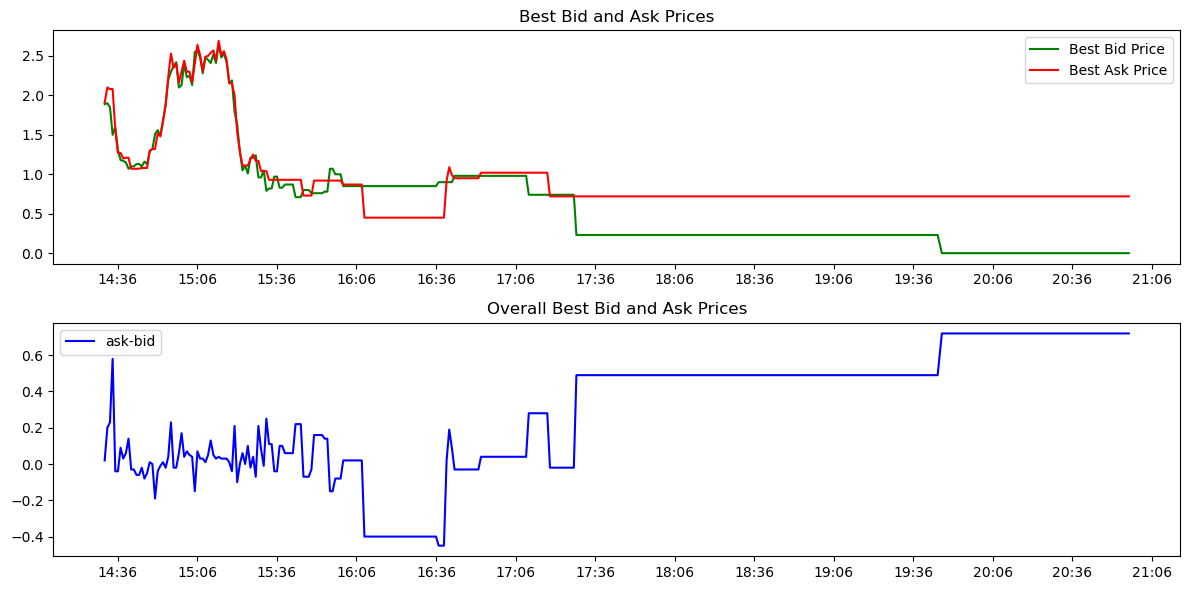

In [72]:
#plt.plot(snapshot_df["timestamp_est"], snapshot_df["best_bid_price"])
#plt.plot(snapshot_df["timestamp_est"], snapshot_df["best_ask_price"])
#plt.plot(snapshot_df["timestamp_est"], snapshot_df["ask_316_unroll_price"])
import matplotlib.dates as mdates
exchange_num=318
plt.figure(figsize=(12, 6))

exch_ask_col = f"ask_{exchange_num}_unroll_price"
exch_bid_col = f"bid_{exchange_num}_unroll_price"

# First plot
ax = plt.subplot(2, 1, 1)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))  # Show every 5 minutes

plt.plot(snapshot_df["timestamp_est"], snapshot_df[exch_bid_col], label="Best Bid Price", color='green')
plt.plot(snapshot_df["timestamp_est"], snapshot_df[exch_ask_col], label="Best Ask Price", color='red')
plt.title("Best Bid and Ask Prices")
plt.legend()
diff_col = snapshot_df[exch_ask_col]-snapshot_df[exch_bid_col]

# Second plot
ax=plt.subplot(2, 1, 2)
plt.plot(snapshot_df["timestamp_est"], diff_col, label="ask-bid", color='blue')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))  # Show every 5 minutes
plt.title("Overall Best Bid and Ask Prices")
plt.legend()

plt.tight_layout()
plt.show()

#plt.plot(snapshot_df["timestamp_est"], snapshot_df[exch_bid_col], label="best_bid_price",color='green')
#plt.plot(snapshot_df["timestamp_est"], snapshot_df[exch_ask_col], label="best_ask_price",color='red')





In [33]:
df_markets.to_csv("df_markets.csv", index=False)

In [36]:
plt.plot(df_markets["timestamp_est"], df_markets["best_bid_price"], label="Best Bid Price")

Error in callback <function flush_figures at 0x3a4239a80> (for post_execute):


KeyboardInterrupt: 

In [ ]:
import copy
bids_df2=copy.deepcopy(bids_df)
bids_df2["bid_309"].apply(pd.Series)
bids_df2["bid_309"].apply(pd.Series).add_prefix("bid_309_")

,bid_309_price,bid_309_size,bid_309_timestamp
501047,0.0,0,2025-01-02 09:30:00.323689-05:00
501048,0.0,0,2025-01-02 09:30:00.323689-05:00
501049,0.0,0,2025-01-02 09:30:00.323689-05:00
501050,0.0,0,2025-01-02 09:30:00.323689-05:00
501051,0.0,0,2025-01-02 09:30:00.323689-05:00
501052,0.0,0,2025-01-02 09:30:00.323689-05:00
501053,0.0,0,2025-01-02 09:30:00.323689-05:00
501054,0.0,0,2025-01-02 09:30:00.323689-05:00
501055,0.0,0,2025-01-02 09:30:00.323689-05:00


In [141]:
bids_df

,bid_309,bid_307,bid_319,bid_320,bid_318
501047,"{'price': 0.0, 'size': 0, 'timestamp': '2025-0...",NaN,NaN,NaN,NaN
501048,"{'price': 0.0, 'size': 0, 'timestamp': '2025-0...","{'price': 1.73, 'size': 8, 'timestamp': '2025-...",NaN,NaN,NaN
501049,"{'price': 0.0, 'size': 0, 'timestamp': '2025-0...","{'price': 1.73, 'size': 8, 'timestamp': '2025-...","{'price': 2.08, 'size': 39, 'timestamp': '2025...",NaN,NaN
501050,"{'price': 0.0, 'size': 0, 'timestamp': '2025-0...","{'price': 1.73, 'size': 8, 'timestamp': '2025-...","{'price': 2.08, 'size': 39, 'timestamp': '2025...","{'price': 1.91, 'size': 58, 'timestamp': '2025...",NaN
501051,"{'price': 0.0, 'size': 0, 'timestamp': '2025-0...","{'price': 1.73, 'size': 8, 'timestamp': '2025-...","{'price': 1.9, 'size': 39, 'timestamp': '2025-...","{'price': 1.91, 'size': 58, 'timestamp': '2025...",NaN
501052,"{'price': 0.0, 'size': 0, 'timestamp': '2025-0...","{'price': 1.73, 'size': 8, 'timestamp': '2025-...","{'price': 1.9, 'size': 39, 'timestamp': '2025-...","{'price': 1.91, 'size': 58, 'timestamp': '2025...",NaN
501053,"{'price': 0.0, 'size': 0, 'timestamp': '2025-0...","{'price': 1.73, 'size': 8, 'timestamp': '2025-...","{'price': 1.9, 'size': 39, 'timestamp': '2025-...","{'price': 1.91, 'size': 58, 'timestamp': '2025...","{'price': 1.88, 'size': 6, 'timestamp': '2025-..."
501054,"{'price': 0.0, 'size': 0, 'timestamp': '2025-0...","{'price': 1.73, 'size': 8, 'timestamp': '2025-...","{'price': 1.9, 'size': 39, 'timestamp': '2025-...","{'price': 1.86, 'size': 58, 'timestamp': '2025...","{'price': 1.88, 'size': 6, 'timestamp': '2025-..."
501055,"{'price': 0.0, 'size': 0, 'timestamp': '2025-0...","{'price': 1.73, 'size': 8, 'timestamp': '2025-...","{'price': 1.86, 'size': 39, 'timestamp': '2025...","{'price': 1.86, 'size': 58, 'timestamp': '2025...","{'price': 1.88, 'size': 6, 'timestamp': '2025-..."


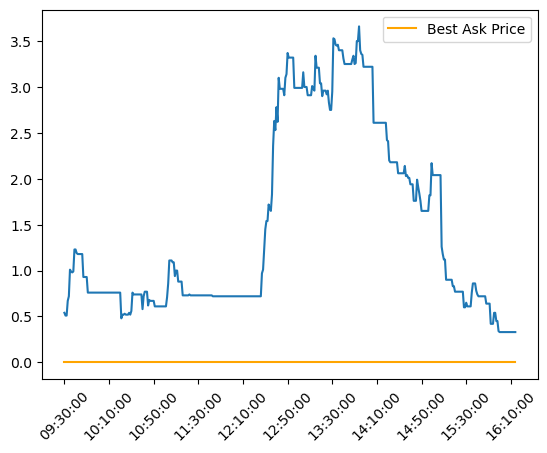

In [120]:
import matplotlib.pyplot as plt
ax=plt.plot(df1["time_str"], df1['best_bid_price'])
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=len(df1["time_str"]) // 30))
plt.plot(df1["time_str"], df1['best_ask_price'], label='Best Ask Price', color='orange')
plt.legend()
plt.show()

df1.to_csv("test.csv", index=False)

In [18]:
import pandas as pd
df_allq=pd.read_csv("data/daily_quotes_1d_2025-01-02.csv")
df_allq["timestamp_est"] = pd.to_datetime(df_allq["timestamp_est"])

In [2]:
tickers=df_allq['ticker'].unique()


In [2]:
from polygon_utils import aggregate_option_quotes,parse_option_ticker
df = aggregate_option_quotes(df_allq)
df[['underlying', 'expiration', 'strike', 'option_type']] = df['ticker'].apply(
    lambda x: pd.Series(parse_option_ticker(x))
)



In [5]:
def create_snapshot(df):
    """
    Create a snapshot of the NBBO feed at each minute.
    """
    # Round timestamps to the nearest minute
    #df["minute"] = df["timestamp_est"].dt.floor("T")  # 'T' stands for minute

    # Group by ticker and minute
    snapshot_df = df.groupby(["ticker", "minute"]).agg(
        bid_price=("bid_price", "last"),  # Last bid price of the minute
        bid_size=("bid_size", "last"),    # Last bid size
        bid_exchange=("bid_exchange", "last"),  # Exchange providing last bid
        best_ask_price=("ask_price", "last"),  # Last ask price of the minute
        best_ask_size=("ask_size", "last"),    # Last ask size
        best_ask_exchange=("ask_exchange", "last")  # Exchange providing last ask
    ).reset_index()

    return snapshot_df

def parse_option_ticker(ticker):
    """
    Parse an option ticker to extract the underlying, expiration, strike, and option type.

    Parameters:
    ticker (str): The option ticker symbol.

    Returns:
    dict: A dictionary containing the underlying, expiration, strike, and option type.
    """
    # Remove the "O:" prefix
    ticker = ticker[2:]

    # Extract the underlying
    underlying = ticker[:-15]

    # Extract the expiration date in YYMMDD format
    expiration = ticker[-15:-9]

    # Extract the option type ('C' for call, 'P' for put)
    option_type = ticker[-9]

    # Extract the strike price (divide by 1000 to get the original strike price)
    strike = int(ticker[-8:]) / 1000

    return {
        "underlying": underlying,
        "expiration": expiration,
        "strike": strike,
        "option_type": option_type
    }


# Load NBBO feed 
all_snapshots = []

for ticker in tickers:
    df_allq["minute"] = df_allq["timestamp_est"].dt.floor("T")  # 'T' stands for minute
    df_ticker = df_allq[df_allq["ticker"] == ticker]
    df_snap = create_snapshot(df_ticker)
    all_snapshots.append(df_snap)

# Combine all snapshots into one DataFrame
df_combined_snapshots = pd.concat(all_snapshots, ignore_index=True)

df_combined_snapshots[['underlying', 'expiration', 'strike', 'option_type']] = df_combined_snapshots['ticker'].apply(
    lambda x: pd.Series(parse_option_ticker(x))
)


df_combined_snapshots.to_csv("combined_snapshots.csv", index=False)

In [ ]:
import pandas as pd
import copy

# Sample DataFrame
data = {
    "ticker": ["O:SPY250102C00554000", "O:SPY250102C00554000", "O:SPY250102C00554000",
               "O:SPY250102P00554000", "O:SPY250102P00554000", "O:SPY250102P00554000"],
    "minute": ["2025-01-02 09:30:00-05:00", "2025-01-02 09:31:00-05:00", "2025-01-02 09:32:00-05:00",
               "2025-01-02 09:30:00-05:00", "2025-01-02 09:31:00-05:00", "2025-01-02 09:32:00-05:00"],
    "bid_price": [34.93, 34.65, 34.89, 5.10, 5.05, 5.20],
    "best_ask_price": [35.91, 36.13, 36.71, 5.50, 5.55, 5.40],
    "underlying": ["SPY"] * 6,
    "expiration": ["250102"] * 6,
    "strike": [554.0] * 6,
    "option_type": ["C", "C", "C", "P", "P", "P"]
}

df_test = pd.DataFrame(data)

# Convert minute column to datetime
df_test["minute"] = pd.to_datetime(df_test["minute"])

# Compute mid-price
df_test["mid_price"] = (df_test["bid_price"] + df_test["best_ask_price"]) / 2

# Pivot data to get calls and puts in the same row
df_pivot = df_test.pivot_table(index=["minute", "strike"], columns="option_type", values="mid_price").reset_index()

# Rename columns for clarity
df_pivot.columns = ["minute", "strike", "call_price", "put_price"]

# Compute C - P + Strike
df_pivot["put_call_parity"] = df_pivot["call_price"] - df_pivot["put_price"] + df_pivot["strike"]

df_pivot

df_test["delta_sign"]=df_test["option_type"].apply(lambda x: 1 if x=="C" else -1)

dfg_groups=df_test.groupby(["strike", "minute"])
for name, group in dfg_groups:
    strike, minute = name
    impl_spot = (group["mid_price"]*group["delta_sign"]).mean()+strike
    #print(strike,impl_spot)
    #print(group)


def compute_put_call_parity(df):
    df=copy.deepcopy(df)
    # Assign +1 for Calls, -1 for Puts
    df["delta_sign"] = df["option_type"].map({"C": 1, "P": -1})
    df["bid_contrib"]=df.apply(lambda x: x["bid_price"] if x["delta_sign"]==1 else x["ask_price"], axis=1)
    df["ask_contrib"]=df.apply(lambda x: x["ask_price"] if x["delta_sign"]==1 else x["bid_price"], axis=1)

    #df["bid_contrib"]=df["bid_price"] if df["delta_sign"]==1 else df["best_ask_price"]
    #df["ask_contrib"]=df["best_ask_price"] if df["delta_sign"]==1 else df["bid_price"]


    # Efficient groupby apply method
    df_parity = df.groupby(["strike", "minute"]).apply(
        lambda group: pd.Series({
            "put_call_parity": (group["mid_price"] * group["delta_sign"]).sum() + group["strike"].iloc[0],
            "bid_parity": (group["bid_contrib"] * group["delta_sign"]).sum() + group["strike"].iloc[0],
            "ask_parity": (group["ask_contrib"] * group["delta_sign"]).sum() + group["strike"].iloc[0]
        })
    ).reset_index()
    return df_parity

df_combined_snapshots["mid_price"] = (df_combined_snapshots["bid_price"] + df_combined_snapshots["best_ask_price"]) / 2
#df_parity = compute_put_call_parity(df_combined_snapshots)
df_parity=compute_put_call_parity(df_combined_snapshots)
df_parity

NameError: name 'df_combined_snapshots' is not defined

In [33]:
import pandas as pd
df=pd.read_csv("data/daily_quotes_1d_agg_2025-01-02.csv")
df["timestamp_est"] = pd.to_datetime(df["timestamp_est"])
df["minute"]=pd.to_datetime(df["minute"])


df_underlying_spot=pd.read_csv("data/SPY_1m_2025-01-02.csv")
df_underlying_spot["timestamp_est"] = pd.to_datetime(df_underlying_spot["timestamp_est"])
df_underlying_spot["minute"]=pd.to_datetime(df_underlying_spot["minute"])
#df_underlying_spot["minute"]=df_underlying_spot["timestamp_est"].dt.floor("T")+pd.Timedelta(minutes=1)

In [5]:
df_pivot.groupby("minute")

NameError: name 'df_pivot' is not defined

In [7]:
df["mid_price"] = (df["bid_price"] + df["ask_price"]) / 2
#df_parity=compute_put_call_parity(df)

In [30]:
import pandas as pd
df=pd.read_csv("merged_data/merged_opt_1m_2025-01-02.csv")
df["timestamp_est_opt"] = pd.to_datetime(df["timestamp_est_opt"])
df["minute"]=pd.to_datetime(df["minute"])

In [31]:
df_pivot = df.pivot_table(index=["strike", "minute"], columns="option_type", values=["bid_price", "ask_price", "bid_size", "mid_price", "ask_size", "close_price"]).reset_index()
df_pivot.columns = ["_".join(col).strip() for col in df_pivot.columns.values]
df_pivot.columns = df_pivot.columns.str.replace("strike_", "strike")
df_pivot.columns = df_pivot.columns.str.replace("minute_", "minute")

# Combine close_price columns into one
df_pivot["close_price"] = df_pivot["close_price_C"].combine_first(df_pivot["close_price_P"])

# Drop the separate close_price columns
df_pivot.drop(columns=["close_price_C", "close_price_P"], inplace=True)

df_pivot["combo_bid"] = df_pivot["bid_price_C"] - df_pivot["ask_price_P"]
df_pivot["combo_ask"] = df_pivot["ask_price_C"] - df_pivot["bid_price_P"]
df_pivot["combo_mid"] = df_pivot["mid_price_C"] - df_pivot["mid_price_P"]

df_pivot["implied_spot"]=df_pivot["strike"]+df_pivot["combo_ask"]/2+df_pivot["combo_bid"]/2
df_pivot["implied_spot2"]=df_pivot["strike"]+df_pivot["combo_mid"]
df_pivot["implied_spot_ask"]=df_pivot["strike"]+df_pivot["combo_ask"]
df_pivot["implied_spot_bid"]=df_pivot["strike"]+df_pivot["combo_bid"]
#df_pivot=pd.merge(df_pivot, df_underlying_spot, on="minute")
minute_groups=df_pivot.groupby("minute")
minute_groups
#for name, group in minute_groups:
#    group.


In [11]:
df_pivot

,strike,minute,ask_price_C,ask_price_P,ask_size_C,ask_size_P,bid_price_C,bid_price_P,bid_size_C,bid_size_P,mid_price_C,mid_price_P,close_price,combo_bid,combo_ask,combo_mid,implied_spot,implied_spot2,implied_spot_ask,implied_spot_bid
0,554.0,2025-01-02 09:31:00-05:00,35.96,0.01,1.0,3564.0,33.51,0.00,2.0,0.0,34.735,0.005,589.45,33.5,35.96,34.73,588.73,588.73,589.96,587.5
1,554.0,2025-01-02 09:32:00-05:00,36.50,NaN,1.0,NaN,33.69,NaN,5.0,NaN,35.095,NaN,589.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,554.0,2025-01-02 09:33:00-05:00,35.91,NaN,1.0,NaN,33.86,NaN,2.0,NaN,34.885,NaN,589.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,554.0,2025-01-02 09:34:00-05:00,35.88,NaN,6.0,NaN,33.30,NaN,1.0,NaN,34.590,NaN,588.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,554.0,2025-01-02 09:35:00-05:00,35.35,NaN,1.0,NaN,32.67,NaN,2.0,NaN,34.010,NaN,587.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24583,614.0,2025-01-02 16:11:00-05:00,NaN,29.70,NaN,60.0,NaN,28.47,NaN,60.0,NaN,29.085,584.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24584,614.0,2025-01-02 16:12:00-05:00,NaN,29.66,NaN,10.0,NaN,28.44,NaN,10.0,NaN,29.050,584.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24585,614.0,2025-01-02 16:13:00-05:00,NaN,29.67,NaN,60.0,NaN,28.44,NaN,60.0,NaN,29.055,584.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24586,614.0,2025-01-02 16:14:00-05:00,NaN,29.71,NaN,5.0,NaN,28.49,NaN,20.0,NaN,29.100,584.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df_underlying_spot["minute"]=df_underlying_spot["timestamp_est"].dt.floor("T")
df_pivot2=pd.merge(df_pivot, df_underlying_spot, on="minute", how="left")

NameError: name 'df_underlying_spot' is not defined

In [43]:
df_pivot2

,strike,minute,ask_price_C,ask_price_P,ask_size_C,ask_size_P,bid_price_C,bid_price_P,bid_size_C,bid_size_P,...,high_price,low_price,close_price,volume,vwap,timestamp,transactions,otc,timestamp_utc,timestamp_est
0,554.0,2025-01-02 09:31:00-05:00,35.96,0.01,1.0,3564.0,33.51,0.00,2.0,0.0,...,589.60,589.0400,589.57,175662.0,589.3385,1735828260000,2160,NaN,2025-01-02 14:31:00+00:00,2025-01-02 09:31:00-05:00
1,554.0,2025-01-02 09:32:00-05:00,36.50,NaN,1.0,NaN,33.69,NaN,5.0,NaN,...,589.65,589.0319,589.09,125032.0,589.3655,1735828320000,1542,NaN,2025-01-02 14:32:00+00:00,2025-01-02 09:32:00-05:00
2,554.0,2025-01-02 09:33:00-05:00,35.91,NaN,1.0,NaN,33.86,NaN,2.0,NaN,...,589.18,587.9800,588.01,132101.0,588.6081,1735828380000,2396,NaN,2025-01-02 14:33:00+00:00,2025-01-02 09:33:00-05:00
3,554.0,2025-01-02 09:34:00-05:00,35.88,NaN,6.0,NaN,33.30,NaN,1.0,NaN,...,588.52,587.8100,587.83,145261.0,588.1590,1735828440000,1916,NaN,2025-01-02 14:34:00+00:00,2025-01-02 09:34:00-05:00
4,554.0,2025-01-02 09:35:00-05:00,35.35,NaN,1.0,NaN,32.67,NaN,2.0,NaN,...,587.91,586.9100,586.91,166855.0,587.4131,1735828500000,2661,NaN,2025-01-02 14:35:00+00:00,2025-01-02 09:35:00-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24583,614.0,2025-01-02 16:11:00-05:00,NaN,29.70,NaN,60.0,NaN,28.47,NaN,60.0,...,584.96,584.8800,584.95,149781.0,585.6731,1735852260000,154,NaN,2025-01-02 21:11:00+00:00,2025-01-02 16:11:00-05:00
24584,614.0,2025-01-02 16:12:00-05:00,NaN,29.66,NaN,10.0,NaN,28.44,NaN,10.0,...,584.99,584.9100,584.93,11420.0,584.9308,1735852320000,85,NaN,2025-01-02 21:12:00+00:00,2025-01-02 16:12:00-05:00
24585,614.0,2025-01-02 16:13:00-05:00,NaN,29.67,NaN,60.0,NaN,28.44,NaN,60.0,...,584.97,584.9000,584.90,1558824.0,584.5036,1735852380000,62,NaN,2025-01-02 21:13:00+00:00,2025-01-02 16:13:00-05:00
24586,614.0,2025-01-02 16:14:00-05:00,NaN,29.71,NaN,5.0,NaN,28.49,NaN,20.0,...,585.11,584.8700,585.08,18826.0,585.0336,1735852440000,172,NaN,2025-01-02 21:14:00+00:00,2025-01-02 16:14:00-05:00


In [28]:
import pandas as pd
def compute_weighted_implied_spot(group):
    """
    Compute the weighted implied spot price for a given minute,
    using only the 5 closest strikes to the underlying close price.
    
    Parameters:
        group (pd.DataFrame): A subset of df_pivot grouped by 'minute'.
    
    Returns:
        float: The weighted average implied spot price.
    """
    # Compute absolute distance from strike to close price
    group["distance"] = abs(group["strike"] - group["close_price"].iloc[0])

    # Select the 5 closest strikes
    group = group.nsmallest(5, "distance")

    # Define weights based on total liquidity
    group["weight"] = (group["bid_size_C"] + group["ask_size_C"] + group["bid_size_P"] + group["ask_size_P"])

    # Normalize weights to sum to 1
    total_weight = group["weight"].sum()
    if total_weight == 0:
        return None  # Avoid division by zero

    group["normalized_weight"] = group["weight"] / total_weight

    # Compute weighted implied spot
    weighted_implied_spot = (group["implied_spot"] * group["normalized_weight"]).sum()

    return weighted_implied_spot

# Apply function to each minute group
weighted_implied_spots = df_pivot.groupby("minute").apply(compute_weighted_implied_spot).reset_index()
weighted_implied_spots.columns = ["minute", "weighted_implied_spot"]
"""
def compute_weighted_implied_spot(group):

    # Define weights based on total liquidity
    group["weight"] = (group["bid_size_C"] + group["ask_size_C"] + group["bid_size_P"] + group["ask_size_P"])

    # Normalize weights to sum to 1
    total_weight = group["weight"].sum()
    if total_weight == 0:
        return None  # Avoid division by zero

    group["normalized_weight"] = group["weight"] / total_weight

    # Compute weighted implied spot
    weighted_implied_spot = (group["implied_spot"] * group["normalized_weight"]).sum()

    return weighted_implied_spot
"""
# Apply function to each minute group
weighted_implied_spots = minute_groups.apply(compute_weighted_implied_spot).reset_index()
weighted_implied_spots.columns = ["minute", "weighted_implied_spot"]

weighted_implied_spots
pd.merge(df_pivot, weighted_implied_spots, on="minute")

,strike,minute,ask_price_C,ask_price_P,ask_size_C,ask_size_P,bid_price_C,bid_price_P,bid_size_C,bid_size_P,...,mid_price_P,close_price,combo_bid,combo_ask,combo_mid,implied_spot,implied_spot2,implied_spot_ask,implied_spot_bid,weighted_implied_spot
0,554.0,2025-01-02 09:31:00-05:00,35.96,0.01,1.0,3564.0,33.51,0.00,2.0,0.0,...,0.005,589.450,33.50,35.96,34.730,588.730,588.730,589.96,587.50,589.462278
1,555.0,2025-01-02 09:31:00-05:00,35.51,0.01,5.0,83.0,32.62,0.00,22.0,0.0,...,0.005,589.450,32.61,35.51,34.060,589.060,589.060,590.51,587.61,589.462278
2,556.0,2025-01-02 09:31:00-05:00,34.54,0.01,5.0,83.0,31.55,0.00,1.0,0.0,...,0.005,589.450,31.54,34.54,33.040,589.040,589.040,590.54,587.54,589.462278
3,557.0,2025-01-02 09:31:00-05:00,33.06,0.01,5.0,83.0,30.66,0.00,4.0,0.0,...,0.005,589.450,30.65,33.06,31.855,588.855,588.855,590.06,587.65,589.462278
4,558.0,2025-01-02 09:31:00-05:00,32.55,0.01,5.0,1824.0,29.63,0.00,4.0,0.0,...,0.005,589.450,29.62,32.55,31.085,589.085,589.085,590.55,587.62,589.462278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24583,611.0,2025-01-02 13:17:00-05:00,NaN,31.20,NaN,1.0,NaN,27.84,NaN,5.0,...,29.520,581.595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,581.602715
24584,612.0,2025-01-02 13:17:00-05:00,NaN,32.20,NaN,1.0,NaN,28.84,NaN,5.0,...,30.520,581.595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,581.602715
24585,613.0,2025-01-02 13:17:00-05:00,NaN,33.20,NaN,1.0,NaN,29.84,NaN,5.0,...,31.520,581.595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,581.602715
24586,614.0,2025-01-02 13:17:00-05:00,NaN,34.20,NaN,1.0,NaN,30.84,NaN,5.0,...,32.520,581.595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,581.602715


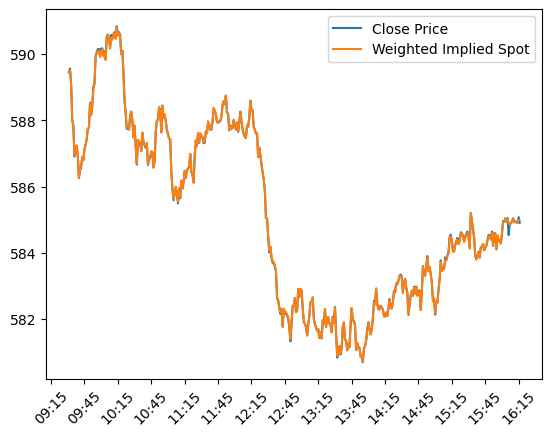

In [34]:
from matplotlib import pyplot as plt
import copy
import matplotlib.dates as mdates
weighted_implied_spots
df_underlying_spot2=copy.deepcopy(df_underlying_spot)
df_underlying_spot["minute"]=df_underlying_spot2["timestamp_est"].dt.floor("T")+pd.Timedelta("1min")
df_test=pd.merge(weighted_implied_spots, df_underlying_spot2, on="minute")
fig,ax=plt.subplots()
ax.plot(df_test["minute"], df_test["close_price"], label="Close Price")
ax.plot(df_test["minute"], df_test["weighted_implied_spot"], label="Weighted Implied Spot")
#ax.plot(df_test["minute"], df_test["close_price"]-df_test["weighted_implied_spot"], label="Close Price")


ax.legend()    
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M", tz=df_test["minute"].dt.tz))
plt.xticks(rotation=45)
plt.show()


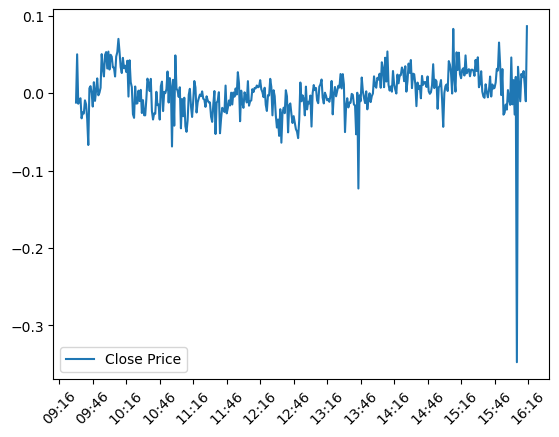

In [59]:

df=pd.read_csv("processed_data/processed_merged_opt_1m_2025-01-02.csv")
#df["timestamp_est"] = pd.to_datetime(df["timestamp_est"])
df["minute"]=pd.to_datetime(df["minute"])
df = df.sort_values(by="minute").reset_index(drop=True)
df2=df.groupby("minute").aggregate({"close_price": "last", "weighted_implied_spot": "last"}).reset_index()
#f3=df.groupby("minute").apply(close_price).reset_index()
fig,ax=plt.subplots()
#ax.plot(df2["minute"], df2["close_price"], label="Close Price")
#ax.plot(df2["minute"], df2["weighted_implied_spot"], label="Weighted Implied Spot")
ax.plot(df2["minute"], df2["close_price"]-df2["weighted_implied_spot"], label="Close Price")


ax.legend()    
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M", tz=df["minute"].dt.tz))
plt.xticks(rotation=45)
plt.show()


In [42]:
df

,strike,minute,ask_price_C,ask_price_P,ask_size_C,ask_size_P,bid_price_C,bid_price_P,bid_size_C,bid_size_P,...,mid_price_P,close_price,combo_bid,combo_ask,combo_mid,implied_spot,implied_spot2,implied_spot_ask,implied_spot_bid,weighted_implied_spot
0,554.0,2025-01-02 09:31:00-05:00,35.96,0.01,1.0,3564.0,33.51,0.00,2.0,0.0,...,0.005,589.450,33.50,35.96,34.730,588.730,588.730,589.96,587.50,589.462278
1,555.0,2025-01-02 09:31:00-05:00,35.51,0.01,5.0,83.0,32.62,0.00,22.0,0.0,...,0.005,589.450,32.61,35.51,34.060,589.060,589.060,590.51,587.61,589.462278
2,556.0,2025-01-02 09:31:00-05:00,34.54,0.01,5.0,83.0,31.55,0.00,1.0,0.0,...,0.005,589.450,31.54,34.54,33.040,589.040,589.040,590.54,587.54,589.462278
3,557.0,2025-01-02 09:31:00-05:00,33.06,0.01,5.0,83.0,30.66,0.00,4.0,0.0,...,0.005,589.450,30.65,33.06,31.855,588.855,588.855,590.06,587.65,589.462278
4,558.0,2025-01-02 09:31:00-05:00,32.55,0.01,5.0,1824.0,29.63,0.00,4.0,0.0,...,0.005,589.450,29.62,32.55,31.085,589.085,589.085,590.55,587.62,589.462278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24583,611.0,2025-01-02 13:17:00-05:00,NaN,31.20,NaN,1.0,NaN,27.84,NaN,5.0,...,29.520,581.595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,581.602715
24584,612.0,2025-01-02 13:17:00-05:00,NaN,32.20,NaN,1.0,NaN,28.84,NaN,5.0,...,30.520,581.595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,581.602715
24585,613.0,2025-01-02 13:17:00-05:00,NaN,33.20,NaN,1.0,NaN,29.84,NaN,5.0,...,31.520,581.595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,581.602715
24586,614.0,2025-01-02 13:17:00-05:00,NaN,34.20,NaN,1.0,NaN,30.84,NaN,5.0,...,32.520,581.595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,581.602715


In [37]:
all_minutes=df["minute"].unique()
choose_minute=all_minutes[250]
df[df["minute"]==choose_minute]

,strike,minute,ask_price_C,ask_price_P,ask_size_C,ask_size_P,bid_price_C,bid_price_P,bid_size_C,bid_size_P,...,mid_price_P,close_price,combo_bid,combo_ask,combo_mid,implied_spot,implied_spot2,implied_spot_ask,implied_spot_bid,weighted_implied_spot
15176,554.0,2025-01-02 13:44:00-05:00,29.09,NaN,5.0,NaN,26.29,NaN,7.0,NaN,...,NaN,581.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,581.893213
15177,555.0,2025-01-02 13:44:00-05:00,28.10,NaN,5.0,NaN,25.66,NaN,257.0,NaN,...,NaN,581.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,581.893213
15178,556.0,2025-01-02 13:44:00-05:00,27.10,NaN,5.0,NaN,24.30,NaN,1.0,NaN,...,NaN,581.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,581.893213
15179,557.0,2025-01-02 13:44:00-05:00,26.30,NaN,12.0,NaN,23.33,NaN,7.0,NaN,...,NaN,581.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,581.893213
15180,558.0,2025-01-02 13:44:00-05:00,25.14,NaN,5.0,NaN,22.33,NaN,7.0,NaN,...,NaN,581.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,581.893213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15232,610.0,2025-01-02 13:44:00-05:00,NaN,28.84,NaN,10.0,NaN,27.62,NaN,5.0,...,28.230,581.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,581.893213
15233,611.0,2025-01-02 13:44:00-05:00,NaN,30.75,NaN,10.0,NaN,28.07,NaN,1.0,...,29.410,581.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,581.893213
15234,612.0,2025-01-02 13:44:00-05:00,NaN,32.04,NaN,6.0,NaN,29.09,NaN,11.0,...,30.565,581.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,581.893213
15235,613.0,2025-01-02 13:44:00-05:00,NaN,32.87,NaN,5.0,NaN,29.80,NaN,1.0,...,31.335,581.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,581.893213


In [163]:
df_pivot

,strike,minute,ask_price_C,ask_price_P,ask_size_C,ask_size_P,bid_price_C,bid_price_P,bid_size_C,bid_size_P,...,high_price,low_price,close_price,volume,vwap,timestamp,transactions,otc,timestamp_utc,timestamp_est
0,554.0,2025-01-02 09:31:00-05:00,35.96,0.01,1.0,3564.0,33.51,0.00,2.0,0.0,...,589.4500,588.46,589.450,1286903.0,588.9191,1735828200000,16412,NaN,2025-01-02 14:30:00+00:00,2025-01-02 09:30:00-05:00
1,555.0,2025-01-02 09:31:00-05:00,35.51,0.01,5.0,83.0,32.62,0.00,22.0,0.0,...,589.4500,588.46,589.450,1286903.0,588.9191,1735828200000,16412,NaN,2025-01-02 14:30:00+00:00,2025-01-02 09:30:00-05:00
2,556.0,2025-01-02 09:31:00-05:00,34.54,0.01,5.0,83.0,31.55,0.00,1.0,0.0,...,589.4500,588.46,589.450,1286903.0,588.9191,1735828200000,16412,NaN,2025-01-02 14:30:00+00:00,2025-01-02 09:30:00-05:00
3,557.0,2025-01-02 09:31:00-05:00,33.06,0.01,5.0,83.0,30.66,0.00,4.0,0.0,...,589.4500,588.46,589.450,1286903.0,588.9191,1735828200000,16412,NaN,2025-01-02 14:30:00+00:00,2025-01-02 09:30:00-05:00
4,558.0,2025-01-02 09:31:00-05:00,32.55,0.01,5.0,1824.0,29.63,0.00,4.0,0.0,...,589.4500,588.46,589.450,1286903.0,588.9191,1735828200000,16412,NaN,2025-01-02 14:30:00+00:00,2025-01-02 09:30:00-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24583,611.0,2025-01-02 13:17:00-05:00,NaN,31.20,NaN,1.0,NaN,27.84,NaN,5.0,...,581.6751,581.25,581.595,81656.0,581.5098,1735841760000,1126,NaN,2025-01-02 18:16:00+00:00,2025-01-02 13:16:00-05:00
24584,612.0,2025-01-02 13:17:00-05:00,NaN,32.20,NaN,1.0,NaN,28.84,NaN,5.0,...,581.6751,581.25,581.595,81656.0,581.5098,1735841760000,1126,NaN,2025-01-02 18:16:00+00:00,2025-01-02 13:16:00-05:00
24585,613.0,2025-01-02 13:17:00-05:00,NaN,33.20,NaN,1.0,NaN,29.84,NaN,5.0,...,581.6751,581.25,581.595,81656.0,581.5098,1735841760000,1126,NaN,2025-01-02 18:16:00+00:00,2025-01-02 13:16:00-05:00
24586,614.0,2025-01-02 13:17:00-05:00,NaN,34.20,NaN,1.0,NaN,30.84,NaN,5.0,...,581.6751,581.25,581.595,81656.0,581.5098,1735841760000,1126,NaN,2025-01-02 18:16:00+00:00,2025-01-02 13:16:00-05:00


implied_spot=589.9178385321102


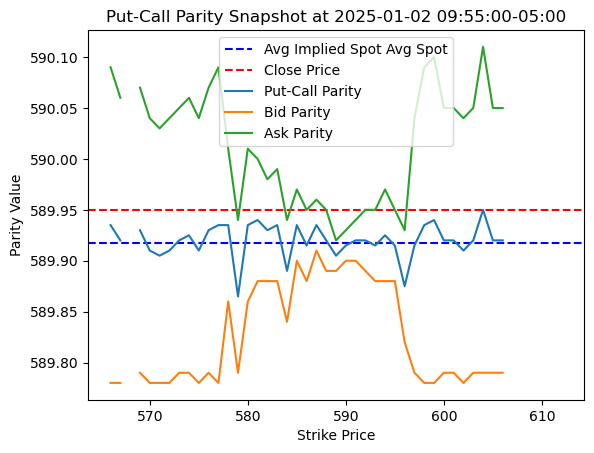

In [11]:

import matplotlib.pyplot as plt
minute=df_pivot["minute"].iloc[1501]
df_pivot_snapshot = df_pivot[df_pivot["minute"] == minute]
df_pivot_snapshot=pd.merge(df_pivot_snapshot, weighted_implied_spots, on=["minute"])


# Add horizontal lines for the weighted averages
implied_spot = df_pivot_snapshot["weighted_implied_spot"][0]
close_price=df_pivot_snapshot["close_price"][0]
print(f"implied_spot={implied_spot}")
plt.axhline(y=implied_spot, color='blue', linestyle='--', label='Avg Implied Spot Avg Spot')
plt.axhline(y=close_price, color='red', linestyle='--', label='Close Price')
plt.plot(df_pivot_snapshot["strike"], df_pivot_snapshot["combo_mid"]+df_pivot_snapshot["strike"], label="Put-Call Parity")
plt.plot(df_pivot_snapshot["strike"], df_pivot_snapshot["combo_bid"]+df_pivot_snapshot["strike"], label="Bid Parity")
plt.plot(df_pivot_snapshot["strike"], df_pivot_snapshot["combo_ask"]+df_pivot_snapshot["strike"], label="Ask Parity")
plt.xlabel("Strike Price")
plt.ylabel("Parity Value")
plt.title(f"Put-Call Parity Snapshot at {minute}")
plt.legend()
plt.show()


In [88]:
df=pd.read_csv("processed_data/processed_merged_opt_1m_2025-01-02.csv")
#df["timestamp_est"] = pd.to_datetime(df["timestamp_est"])
df["minute"]=pd.to_datetime(df["minute"])
df = df.sort_values(by="minute").reset_index(drop=True)

In [81]:
df

,strike,minute,ask_price_C,ask_price_P,ask_size_C,ask_size_P,bid_price_C,bid_price_P,bid_size_C,bid_size_P,...,mid_price_P,close_price,combo_bid,combo_ask,combo_mid,implied_spot,implied_spot2,implied_spot_ask,implied_spot_bid,weighted_implied_spot
0,554.0,2025-01-02 09:31:00-05:00,35.96,0.01,1.0,3564.0,33.51,0.00,2.0,0.0,...,0.005,589.45,33.50,35.96,34.730,588.730,588.730,589.96,587.50,589.462278
1,587.0,2025-01-02 09:31:00-05:00,3.45,0.96,5.0,80.0,3.40,0.94,1.0,98.0,...,0.950,589.45,2.44,2.51,2.475,589.475,589.475,589.51,589.44,589.462278
2,588.0,2025-01-02 09:31:00-05:00,2.74,1.28,26.0,130.0,2.69,1.25,39.0,62.0,...,1.265,589.45,1.41,1.49,1.450,589.450,589.450,589.49,589.41,589.462278
3,589.0,2025-01-02 09:31:00-05:00,2.10,1.62,84.0,25.0,2.07,1.60,57.0,59.0,...,1.610,589.45,0.45,0.50,0.475,589.475,589.475,589.50,589.45,589.462278
4,590.0,2025-01-02 09:31:00-05:00,1.55,2.10,2.0,49.0,1.53,2.06,50.0,54.0,...,2.080,589.45,-0.57,-0.51,-0.540,589.460,589.460,589.49,589.43,589.462278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24583,579.0,2025-01-02 16:15:00-05:00,6.65,NaN,45.0,NaN,5.50,NaN,45.0,NaN,...,NaN,585.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,584.993691
24584,580.0,2025-01-02 16:15:00-05:00,5.57,NaN,50.0,NaN,4.61,NaN,50.0,NaN,...,NaN,585.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,584.993691
24585,581.0,2025-01-02 16:15:00-05:00,4.65,NaN,25.0,NaN,3.50,NaN,1132.0,NaN,...,NaN,585.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,584.993691
24586,583.0,2025-01-02 16:15:00-05:00,2.12,0.01,50.0,548.0,1.99,0.00,50.0,0.0,...,0.005,585.08,1.98,2.12,2.050,585.050,585.050,585.12,584.98,584.993691


In [ ]:

from datetime import datetime
import pytz
def create_4pm_datetime(localized_datetime):
    """
    Create a localized 4pm datetime on the same date as the input datetime.
    
    Parameters:
        localized_datetime (datetime): The input localized datetime.
    
    Returns:
        datetime: A localized datetime set to 4pm on the same date.
    """
    # Extract the date part of the input datetime
    date_part = localized_datetime.date()
    
    # Create a new datetime object for 4pm on the same date
    four_pm = datetime(date_part.year, date_part.month, date_part.day, 16, 17, 0)
    
    # Localize the new datetime object to the same timezone as the input datetime
    localized_four_pm = localized_datetime.tzinfo.localize(four_pm)
    
    return localized_four_pm


In [109]:

import py_vollib.black_scholes_merton.implied_volatility
import py_vollib_vectorized
input_datetime = df["minute"].iloc[0]
localized_4pm = create_4pm_datetime(input_datetime)
df["texp"]=localized_4pm-df["minute"]
#df["texp_years"]=df_combined_snapshots["texp"].dt.total_seconds()/31557600
#df["texp_years"]=df_combined_snapshots["texp_years"]*(14.0/7.0)

df["texp_years"]=df["texp"].dt.total_seconds()/31557600
#df["texp_years"]=df["texp_years"]*(14.0/7.0)
def compute_implied_volatility(df):

    df_internal=copy.deepcopy(df)
    flag_c=df["strike"].apply(lambda x: "c")
    flag_p=df["strike"].apply(lambda x: "p")

    strike=df["strike"]

    #s=df["close_price"]
    s=df["weighted_implied_spot"]
    t=df["texp_years"]
    r=0.0000001
    price_fields=["bid_price_C", "mid_price_C", "ask_price_C", "bid_price_P", "mid_price_P", "ask_price_P"]
    iv_fields=["bid_iv_C", "mid_iv_C", "ask_iv_C", "bid_iv_P", "mid_iv_P","ask_iv_P"]
    flag_fields=["c", "c", "c", "p", "p", "p"]
    for price_field, iv_field, flag_field in zip(price_fields, iv_fields, flag_fields):
        f=df[price_field]
        iv=py_vollib_vectorized.vectorized_implied_volatility(f, s, strike, t, r,flag_field)
        df[iv_field]=iv 
    return df

def compute_greeks(df):
    df_internal=copy.deepcopy(df)
    #df2=pd.merge(df_internal, df_implied_spots, on="minute")
    df=df_internal
    print(f"df.columns = {df.columns}")

    strike=df["strike"]
    s=df["weighted_implied_spot"]
    t=df["texp_years"]


    r=0.0000001
    iv_fields=["bid_iv_C", "mid_iv_C", "ask_iv_C", "bid_iv_P", "mid_iv_P","ask_iv_P"]
    flag_fields=["c", "c", "c", "p", "p", "p"]
    delta_fields=["delta_bid_C", "delta_mid_C", "delta_ask_C", "delta_bid_P", "delta_mid_P", "delta_ask_P"]
    for iv_field, flag_field, delta_field in zip(iv_fields, flag_fields, delta_fields):
        delta=py_vollib_vectorized.vectorized_delta(flag_field, s, strike, t, r, df[iv_field], model='black_scholes', return_as='numpy')
        df[delta_field]=delta
    return df




df2=compute_implied_volatility(df)
df3=compute_greeks(df2)

fields=["bid", "mid", "ask"]
cp_fields=["C", "P"]

c_iv_fields={field: f"{field}_iv_C" for field in fields}
p_iv_fields={field: f"{field}_iv_P" for field in fields}


#df3


df.columns = Index(['strike', 'minute', 'ask_price_C', 'ask_price_P', 'ask_size_C',
       'ask_size_P', 'bid_price_C', 'bid_price_P', 'bid_size_C', 'bid_size_P',
       'mid_price_C', 'mid_price_P', 'close_price', 'combo_bid', 'combo_ask',
       'combo_mid', 'implied_spot', 'implied_spot2', 'implied_spot_ask',
       'implied_spot_bid', 'weighted_implied_spot', 'texp', 'texp_years',
       'bid_iv_C', 'mid_iv_C', 'ask_iv_C', 'bid_iv_P', 'mid_iv_P', 'ask_iv_P'],
      dtype='object')


/Applications/anaconda3/envs/ml_env2/lib/python3.11/site-packages/py_vollib_vectorized/implied_volatility.py:75: UserWarning: Found Below Intrinsic contracts at index [0, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 91, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 111, 113, 114, 116, 117, 118, 119, 120, 121, 152, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 235, 236, 238, 239, 240, 241, 242, 243, 274, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 291, 296, 297, 299, 300, 301, 302, 303, 304, 335, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 352, 353, 358, 360, 361, 362, 363, 364, 365, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 413, 417, 418, 419, 421, 422, 423, 424, 425, 426, 460, 4

In [110]:
def compute_delta_weighted_volatility(df):
    df=copy.deepcopy(df)

    fields=["bid", "mid", "ask"]
    cp_fields=["C", "P"]

    c_iv_fields={field: f"{field}_iv_C" for field in fields}
    p_iv_fields={field: f"{field}_iv_P" for field in fields}
    c_delta_fields={field: f"delta_{field}_C" for field in fields}
    p_delta_fields={field: f"delta_{field}_P" for field in fields}
    dw_vol_fields={field: f"dw_vol_{field}" for field in fields}
    for field in fields:
        c_delta=df[c_delta_fields[field]]
        c_vol=df[c_iv_fields[field]]
        p_vol=df[p_iv_fields[field]]
        dw_vol=c_vol*(1-c_delta)+p_vol*c_delta
        df[dw_vol_fields[field]]=dw_vol
    return df
"""    
fields=["bid", "mid", "ask"]
cp_fields=["C", "P"]

c_iv_fields={field: f"{field}_iv_C" for field in fields}
p_iv_fields={field: f"{field}_iv_P" for field in fields}
c_delta_fields={field: f"delta_{field}_C" for field in fields}
p_delta_fields={field: f"delta_{field}_P" for field in fields}
dw_vol_fields={field: f"dw_vol_{field}" for field in fields}


for field in fields:
    c_delta=df3[c_delta_fields[field]]
    c_vol=df3[c_iv_fields[field]]
    p_vol=df3[p_iv_fields[field]]
    dw_vol=c_vol*(1-c_delta)+p_vol*c_delta
    df3[dw_vol_fields[field]]=dw_vol
"""
df3=compute_delta_weighted_volatility(df3)
df3    

,strike,minute,ask_price_C,ask_price_P,ask_size_C,ask_size_P,bid_price_C,bid_price_P,bid_size_C,bid_size_P,...,ask_iv_P,delta_bid_C,delta_mid_C,delta_ask_C,delta_bid_P,delta_mid_P,delta_ask_P,dw_vol_bid,dw_vol_mid,dw_vol_ask
0,554.0,2025-01-02 09:31:00-05:00,35.96,0.01,1.0,3564.0,33.51,0.00,2.0,0.0,...,0.800418,NaN,NaN,0.948520,0.000000,-0.001422,-0.002546,NaN,NaN,0.830556
1,587.0,2025-01-02 09:31:00-05:00,3.45,0.96,5.0,80.0,3.40,0.94,1.0,98.0,...,0.298878,0.696664,0.694081,0.691572,-0.303575,-0.304614,-0.305642,0.295269,0.297814,0.300364
2,588.0,2025-01-02 09:31:00-05:00,2.74,1.28,26.0,130.0,2.69,1.25,39.0,62.0,...,0.294743,0.624068,0.622448,0.620872,-0.377378,-0.378331,-0.379269,0.288579,0.291591,0.294605
3,589.0,2025-01-02 09:31:00-05:00,2.10,1.62,84.0,25.0,2.07,1.60,57.0,59.0,...,0.282025,0.541690,0.541376,0.541067,-0.458146,-0.458358,-0.458568,0.279492,0.281384,0.283277
4,590.0,2025-01-02 09:31:00-05:00,1.55,2.10,2.0,49.0,1.53,2.06,50.0,54.0,...,0.278204,0.453701,0.453976,0.454249,-0.546514,-0.545961,-0.545421,0.272691,0.274931,0.277172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24583,579.0,2025-01-02 16:15:00-05:00,6.65,NaN,45.0,NaN,5.50,NaN,45.0,NaN,...,NaN,NaN,0.948032,0.819143,NaN,NaN,NaN,NaN,NaN,NaN
24584,580.0,2025-01-02 16:15:00-05:00,5.57,NaN,50.0,NaN,4.61,NaN,50.0,NaN,...,NaN,NaN,0.934126,0.814180,NaN,NaN,NaN,NaN,NaN,NaN
24585,581.0,2025-01-02 16:15:00-05:00,4.65,NaN,25.0,NaN,3.50,NaN,1132.0,NaN,...,NaN,NaN,0.931666,0.780785,NaN,NaN,NaN,NaN,NaN,NaN
24586,583.0,2025-01-02 16:15:00-05:00,2.12,0.01,50.0,548.0,1.99,0.00,50.0,0.0,...,0.899035,NaN,0.910866,0.863503,0.000000,-0.015238,-0.025699,NaN,0.853236,0.994623


In [76]:
aaa=[1,2,3]
bbb=[4,5,6]
ccc=[7,8,9]
zip(aaa,bbb,ccc)
for x,y,z in zip(aaa,bbb,ccc):
    print(f"x={x}, y={y}, z={z}")

x=1, y=4, z=7
x=2, y=5, z=8
x=3, y=6, z=9


In [101]:
df3

,strike,minute,ask_price_C,ask_price_P,ask_size_C,ask_size_P,bid_price_C,bid_price_P,bid_size_C,bid_size_P,...,ask_iv_C,bid_iv_P,mid_iv_P,ask_iv_P,delta_bid_C,delta_mid_C,delta_ask_C,delta_bid_P,delta_mid_P,delta_ask_P
0,554.0,2025-01-02 09:31:00-05:00,35.96,0.01,1.0,3564.0,33.51,0.00,2.0,0.0,...,1.385858,0.000000,0.751004,0.800418,NaN,NaN,0.948520,0.000000,-0.001422,-0.002546
1,587.0,2025-01-02 09:31:00-05:00,3.45,0.96,5.0,80.0,3.40,0.94,1.0,98.0,...,0.303696,0.295390,0.297135,0.298878,0.696664,0.694081,0.691572,-0.303575,-0.304614,-0.305642
2,588.0,2025-01-02 09:31:00-05:00,2.74,1.28,26.0,130.0,2.69,1.25,39.0,62.0,...,0.294378,0.289926,0.292336,0.294743,0.624068,0.622448,0.620872,-0.377378,-0.378331,-0.379269
3,589.0,2025-01-02 09:31:00-05:00,2.10,1.62,84.0,25.0,2.07,1.60,57.0,59.0,...,0.284752,0.278947,0.280486,0.282025,0.541690,0.541376,0.541067,-0.458146,-0.458358,-0.458568
4,590.0,2025-01-02 09:31:00-05:00,1.55,2.10,2.0,49.0,1.53,2.06,50.0,54.0,...,0.276313,0.272041,0.275123,0.278204,0.453701,0.453976,0.454249,-0.546514,-0.545961,-0.545421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24583,579.0,2025-01-02 16:15:00-05:00,6.65,NaN,45.0,NaN,5.50,NaN,45.0,NaN,...,5.826510,NaN,NaN,NaN,NaN,0.948032,0.819143,NaN,NaN,NaN
24584,580.0,2025-01-02 16:15:00-05:00,5.57,NaN,50.0,NaN,4.61,NaN,50.0,NaN,...,4.947597,NaN,NaN,NaN,NaN,0.934126,0.814180,NaN,NaN,NaN
24585,581.0,2025-01-02 16:15:00-05:00,4.65,NaN,25.0,NaN,3.50,NaN,1132.0,NaN,...,4.559892,NaN,NaN,NaN,NaN,0.931666,0.780785,NaN,NaN,NaN
24586,583.0,2025-01-02 16:15:00-05:00,2.12,0.01,50.0,548.0,1.99,0.00,50.0,0.0,...,1.599332,0.000000,0.809343,0.899035,NaN,0.910866,0.863503,0.000000,-0.015238,-0.025699


In [14]:
import py_vollib.black_scholes_merton.implied_volatility
import py_vollib_vectorized
input_datetime = df["minute"].iloc[0]
localized_4pm = create_4pm_datetime(input_datetime)
df["texp"]=localized_4pm-df["minute"]
#df["texp_years"]=df_combined_snapshots["texp"].dt.total_seconds()/31557600
#df["texp_years"]=df_combined_snapshots["texp_years"]*(14.0/7.0)

df["texp_years"]=df["texp"].dt.total_seconds()/31557600
#df["texp_years"]=df["texp_years"]*(14.0/7.0)
def compute_implied_volatility(df,df_implied_spots):

    df_internal=copy.deepcopy(df)
    df2=pd.merge(df_internal, df_implied_spots, on="minute")
    df=df2
    flag=df["option_type"].apply(lambda x: "c" if x=="C" else "p")
    strike=df["strike"]
    f=df["bid_price"]
    f_ask=df["ask_price"]
    f_mid=df["mid_price"]
    #s=df["close_price"]
    s=df["weighted_implied_spot"]
    t=df["texp_years"]
    r=0.0000001
    bid_iv=py_vollib_vectorized.vectorized_implied_volatility(f, s, strike, t, r,flag)
    ask_iv=py_vollib_vectorized.vectorized_implied_volatility(f_ask, s, strike, t, r,flag)
    mid_iv=py_vollib_vectorized.vectorized_implied_volatility(f_mid, s, strike, t, r,flag)
    df["bid_iv"]=bid_iv
    df["ask_iv"]=ask_iv
    df["mid_iv"]=mid_iv
    return df

def compute_greeks(df,df_implied_spots):
    df_internal=copy.deepcopy(df)
    #df2=pd.merge(df_internal, df_implied_spots, on="minute")
    df=df_internal
    print(f"df.columns = {df.columns}")

    flag=df["option_type"].apply(lambda x: "c" if x=="C" else "p")
    strike=df["strike"]
    f=df["bid_price"]
    f_ask=df["ask_price"]
    f_mid=df["mid_price"]
    #s=df["close_price"]
    s=df["weighted_implied_spot"]
    t=df["texp_years"]
    vol=df["mid_iv"]
    r=0.0000001
    #greeks=py_vollib_vectorized.vectorized_greeks(flag, s, strike, t, r,vol)
    py_vollib_vectorized.vectorized_black_scholes(flag, s, strike, t, r,vol)
    delta=py_vollib_vectorized.vectorized_delta(flag, s, strike, t, r, vol, model='black_scholes', return_as='numpy')  # equivalent

    df["delta"]=delta
    #df["gamma"]=greeks["gamma"]
    #df["theta"]=greeks["theta"]
    #df["vega"]=greeks["vega"]
    #df["rho"]=greeks["rho"]
    return df




df2=compute_implied_volatility(df,weighted_implied_spots)
df3=compute_greeks(df2,weighted_implied_spots)
df3


df.columns = Index(['ticker', 'bid_price', 'ask_price', 'bid_size', 'ask_size',
       'bid_exchange', 'ask_exchange', 'sequence_number', 'timestamp',
       'timestamp_utc', 'timestamp_est', 'underlying', 'expiration', 'strike',
       'option_type', 'minute', 'mid_price', 'texp', 'texp_years',
       'weighted_implied_spot', 'bid_iv', 'ask_iv', 'mid_iv'],
      dtype='object')


/Applications/anaconda3/envs/ml_env2/lib/python3.11/site-packages/py_vollib_vectorized/implied_volatility.py:75: UserWarning: Found Below Intrinsic contracts at index [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 147, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428

,ticker,bid_price,ask_price,bid_size,ask_size,bid_exchange,ask_exchange,sequence_number,timestamp,timestamp_utc,...,option_type,minute,mid_price,texp,texp_years,weighted_implied_spot,bid_iv,ask_iv,mid_iv,delta
0,O:SPY250102C00554000,33.51,35.96,2,1,316,313,7174301,1735828257569959168,2025-01-02 14:30:57.569959+00:00,...,C,2025-01-02 09:31:00-05:00,34.735,0 days 06:46:00,0.000772,589.462278,NaN,1.385858,NaN,NaN
1,O:SPY250102C00555000,32.62,35.51,22,5,307,301,7225166,1735828258062212096,2025-01-02 14:30:58.062212+00:00,...,C,2025-01-02 09:31:00-05:00,34.065,0 days 06:46:00,0.000772,589.462278,NaN,1.607726,NaN,NaN
2,O:SPY250102C00556000,31.55,34.54,1,5,325,301,7281688,1735828258817517056,2025-01-02 14:30:58.817517+00:00,...,C,2025-01-02 09:31:00-05:00,33.045,0 days 06:46:00,0.000772,589.462278,NaN,1.583002,NaN,NaN
3,O:SPY250102C00557000,30.66,33.06,4,5,313,301,7371810,1735828259799123200,2025-01-02 14:30:59.799123+00:00,...,C,2025-01-02 09:31:00-05:00,31.860,0 days 06:46:00,0.000772,589.462278,NaN,1.341312,NaN,NaN
4,O:SPY250102C00558000,29.63,32.55,4,5,313,301,7366471,1735828259748952832,2025-01-02 14:30:59.748953+00:00,...,C,2025-01-02 09:31:00-05:00,31.090,0 days 06:46:00,0.000772,589.462278,NaN,1.513581,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35518,O:SPY250102P00604000,20.64,23.92,10,1,304,319,1295444312,1735841992281482496,2025-01-02 18:19:52.281482+00:00,...,P,2025-01-02 13:20:00-05:00,22.280,0 days 02:57:00,0.000337,581.834366,NaN,2.002804,1.051497,-0.973112
35519,O:SPY250102P00605000,21.64,24.92,10,1,304,313,1295444318,1735841992281482496,2025-01-02 18:19:52.281482+00:00,...,P,2025-01-02 13:20:00-05:00,23.280,0 days 02:57:00,0.000337,581.834366,NaN,2.060594,1.090140,-0.973950
35520,O:SPY250102P00610000,26.65,29.91,10,1,302,313,1295444313,1735841992281482496,2025-01-02 18:19:52.281482+00:00,...,P,2025-01-02 13:20:00-05:00,28.280,0 days 02:57:00,0.000337,581.834366,NaN,2.337534,1.279552,-0.977369
35521,O:SPY250102P00612000,28.66,31.91,10,1,304,313,1295444314,1735841992281482496,2025-01-02 18:19:52.281482+00:00,...,P,2025-01-02 13:20:00-05:00,30.285,0 days 02:57:00,0.000337,581.834366,NaN,2.446642,1.362681,-0.977759


In [15]:
df_vol_pivot = df3.pivot_table(index=["strike", "minute"], columns="option_type",values=["bid_price","ask_price","bid_size","mid_price","ask_size","bid_iv","mid_iv","ask_iv","delta"]).reset_index()
df_vol_pivot.columns = ["_".join(col).strip() for col in df_vol_pivot.columns.values]
df_vol_pivot.columns = df_vol_pivot.columns.str.replace("strike_", "strike")
df_vol_pivot.columns = df_vol_pivot.columns.str.replace("minute_", "minute")

In [16]:
df_vol_pivot["dw_vol_bid"]=df_vol_pivot["bid_iv_C"]*(1-df_vol_pivot["delta_C"])+df_vol_pivot["bid_iv_P"]*df_vol_pivot["delta_C"]
df_vol_pivot["dw_vol_ask"]=df_vol_pivot["ask_iv_C"]*(1-df_vol_pivot["delta_C"])+df_vol_pivot["ask_iv_P"]*df_vol_pivot["delta_C"]
df_vol_pivot["dw_vol_mid"]=df_vol_pivot["mid_iv_C"]*(1-df_vol_pivot["delta_C"])+df_vol_pivot["mid_iv_P"]*df_vol_pivot["delta_C"]
df_vol_pivot=pd.merge(df_vol_pivot, weighted_implied_spots, on="minute")

In [17]:
vol_minute_groups=df_vol_pivot.groupby("minute")

In [20]:

all_minutes=df_vol_pivot["minute"].unique()
choose_minute=all_minutes[370]
for name, group in vol_minute_groups:
    #print(f"name={name}")
    #print(f"group={group}")
    gr=group
    if (name==choose_minute):
        break


In [ ]:
def create_fitting_parameters(group):
    """
    Create fitting parameters for the volatility surface.
    
    Parameters:
        group (pd.DataFrame): A group of data points for a specific minute.
    
    Returns:
        dict: A dictionary containing the fitting parameters.
    """
    df=copy.deepcopy(group)
    df=df.dropna()
    spot=df["weighted_implied_spot"].iloc[0]
    # Extract relevant data
    strikes = df["strike"]
    dw_vol_bid = df["dw_vol_bid"]
    dw_vol_ask = df["dw_vol_ask"]
    dw_vol_mid = df["dw_vol_mid"]

    # Fit a linear regression model to the bid prices
    bid_params = np.polyfit(strikes, dw_vol_bid, 1)

    # Fit a linear regression model to the ask prices
    ask_params = np.polyfit(strikes, dw_vol_ask, 1)

    # Fit a linear regression model to the mid prices
    mid_params = np.polyfit(strikes, dw_vol_mid, 1)

    # Compute the slope and intercept for each regression
    bid_slope, bid_intercept = bid_params
    ask_slope, ask_intercept = ask_params
    mid_slope, mid_intercept = mid_params

    return {
        "bid_slope": bid_slope,
        "bid_intercept": bid_intercept,
        "ask_slope": ask_slope,
        "ask_intercept": ask_intercept,
        "mid_slope": mid_slope,
        "mid_intercept": mid_intercept
    }
a=create_fitting_parameters(gr)

In [25]:
a

{'bid_slope': -0.00484766541922458,
 'bid_intercept': 3.1844333275723486,
 'ask_slope': -0.005328774739765515,
 'ask_intercept': 3.480367989361773,
 'mid_slope': -0.0051149008723704445,
 'mid_intercept': 3.3481687826758653}

In [304]:
import numpy as np
vols=gr[["minute","strike","dw_vol_bid","dw_vol_ask","dw_vol_mid", "weighted_implied_spot"]]
vols=vols.dropna()
spot=vols["weighted_implied_spot"].iloc[0]

input_datetime = vols["minute"].iloc[0]
localized_4pm = create_4pm_datetime(input_datetime)
texp=localized_4pm-input_datetime
texp_years=texp.total_seconds()/31557600
texp_years
dist_from_spot=abs(vols["strike"]-spot)
vols["dist_from_spot"]=dist_from_spot
vols_atm=vols.nsmallest(2, "dist_from_spot")
vols_atm["weight"]=(1-vols_atm["dist_from_spot"])/vols_atm["dist_from_spot"].sum()
atm_vol=(vols_atm["dw_vol_mid"]*vols_atm["weight"]).sum()

a_vols=vols["dw_vol_mid"]
bid_vols=vols["dw_vol_bid"]
ask_vols=vols["dw_vol_ask"]
a_strikes=vols["strike"]

#import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression
log_strikes = np.log(a_strikes)-np.log(spot)
# Create a Linear Regression model
model = LinearRegression(fit_intercept=True)
model.fit(log_strikes.values.reshape(-1, 1), a_vols - atm_vol)
model.intercept_ = atm_vol
model.coef_ = model.coef_

# Calculate the fitted values
fitted_values = model.predict(log_strikes.values.reshape(-1, 1))
fitted_values = fitted_values 
model.coef_


array([-2.9910931])

In [83]:
from scipy.optimize import curve_fit
# Define the model function
def vol_model(log_moneyness, m, m2, atm_vol, t=1):
    return atm_vol + (m / np.sqrt(t)) * log_moneyness+ m2 * log_moneyness**2
alpha = 10000
weights = np.exp(-alpha * log_strikes**2)

popt, _ = curve_fit(lambda x, m, m2: vol_model(x, m, m2, atm_vol), log_strikes, a_vols, sigma=1/weights)
m2 = popt[0]
m21 = popt[1]
model2=copy.deepcopy(model)
model2.coef_=np.array([m2])
#model2.intercept_=atm_vol
fitted_values2 = model2.predict(log_strikes.values.reshape(-1, 1))+m21*log_strikes**2

NameError: name 'log_strikes' is not defined

In [82]:
m2


NameError: name 'm2' is not defined

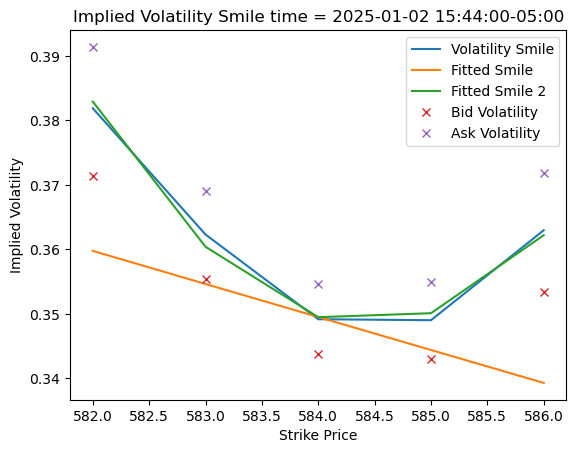

In [306]:
ax,fig=plt.subplots()
plt.plot(a_strikes, a_vols, label="Volatility Smile")
plt.plot(a_strikes, fitted_values, label="Fitted Smile")
plt.plot(a_strikes, fitted_values2, label="Fitted Smile 2")
plt.plot(a_strikes, bid_vols, label="Bid Volatility", linestyle="none", marker="x")
plt.plot(a_strikes, ask_vols, label="Ask Volatility", linestyle="none", marker="x")
plt.xlabel("Strike Price")
plt.ylabel("Implied Volatility")
plt.title(f"Implied Volatility Smile time = {choose_minute}")
plt.legend()
plt.show()


In [ ]:
import numpy
def compute_vol_curve(group):
    """
    Compute the weighted implied spot price for a given minute,
    using only the 5 closest strikes to the underlying close price.
    
    Parameters:
        group (pd.DataFrame): A subset of df_pivot grouped by 'minute'.
    
    Returns:
        float: The weighted average implied spot price.
    """
    # Compute absolute distance from strike to close price
    group=group.dropna()
    group["distance"] = abs(group["strike"] - group["close_price"].iloc[0])

    # Select the 5 closest strikes
    group_atm = group.nsmallest(3, "distance")
    atm_vol=group_atm["dw_vol_mid"].mean()
    atm_anchor=group_atm["strike"].mean()



    # Define weights based on total liquidity
    group["weight"] = np.abs(group["strike"] - atm_anchor)
    group["log_strike"]=np.log(group["strike"])-np.log(atm_anchor)
    group["slope"]=(group["dw_vol_mid"]-atm_vol)/group["log_strike"]


    # Normalize weights to sum to 1
    total_weight = group["weight"].sum()
    if total_weight == 0:
        return None  # Avoid division by zero

    group["normalized_weight"] = group["weight"] / total_weight

    # Compute weighted implied spot
    weighted_implied_spot = (group["implied_spot"] * group["normalized_weight"]).sum()

    return weighted_implied_spot


In [ ]:
import numpy as np
np.sin

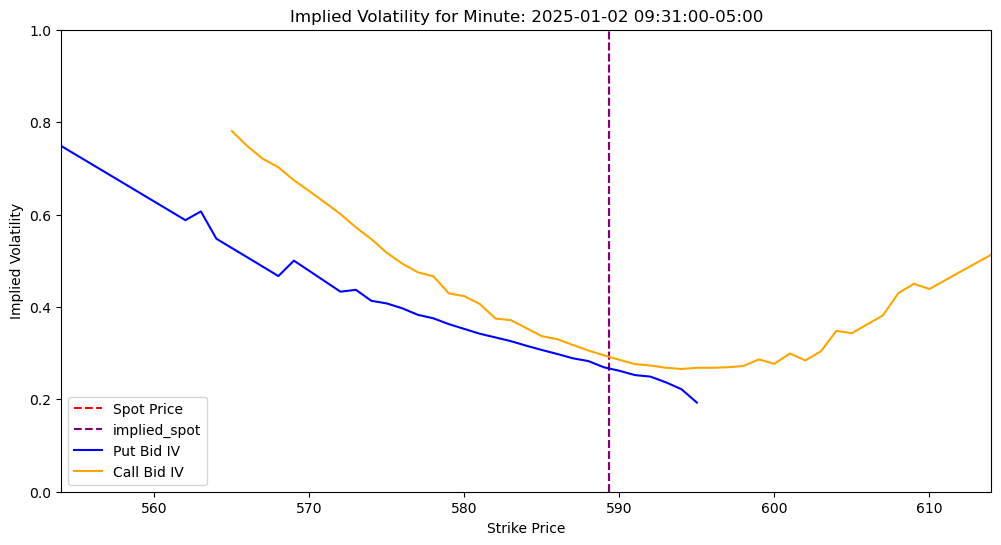

In [128]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.animation import FuncAnimation, PillowWriter
minutes=df["minute"].unique()
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Function to update the plot for each frame
def update(minute):
    ax.clear()
    df_minute = df2[df2["minute"] == minute]
    #implied_spot = df_results[df_results["minute"] == minute]["combined_weighted_avg_spot"].iloc[0]
    #df_minute=pd.merge(df_minute, df_implied_spots, on="minute")
    df_put = df_minute[df_minute["option_type"] == "P"]
    df_call = df_minute[df_minute["option_type"] == "C"]
    implied_spot_val = df_minute["weighted_implied_spot"].iloc[0]
    #spot_val = df_minute["close_price"].iloc[0]
    ax.axvline(x=implied_spot_val, color='red', linestyle='--', label='Spot Price')
    ax.axvline(x=implied_spot_val, color='purple', linestyle='--', label='implied_spot')
    ax.plot(df_put["strike"], df_put["mid_iv"], label='Put Bid IV', color='blue')
    ax.plot(df_call["strike"], df_call["mid_iv"], label='Call Bid IV', color='orange')
    
    ax.set_ylim(0, 1)
    ax.set_xlim(df["strike"].min(), df["strike"].max())
    ax.set_xlabel('Strike Price')
    ax.set_ylabel('Implied Volatility')
    ax.set_title(f'Implied Volatility for Minute: {minute}')
    ax.legend()

# Create the animation
ani = FuncAnimation(fig, update, frames=sorted(minutes), repeat=False)

# Save the animation as a video file
ani.save("implied_volatility_animation2.mp4", writer='ffmpeg', fps=2)

# Display the animation
from IPython.display import Video
Video("implied_volatility_animation2.mp4")

In [123]:
df2

,ticker,bid_price,ask_price,bid_size,ask_size,bid_exchange,ask_exchange,sequence_number,timestamp,timestamp_utc,...,strike,option_type,minute,mid_price,texp,texp_years,weighted_implied_spot,bid_iv,ask_iv,mid_iv
0,O:SPY250102C00554000,33.51,35.96,2,1,316,313,7174301,1735828257569959168,2025-01-02 14:30:57.569959+00:00,...,554.0,C,2025-01-02 09:31:00-05:00,34.735,0 days 06:46:00,0.000772,589.306024,NaN,1.464879,NaN
1,O:SPY250102C00555000,32.62,35.51,22,5,307,301,7225166,1735828258062212096,2025-01-02 14:30:58.062212+00:00,...,555.0,C,2025-01-02 09:31:00-05:00,34.065,0 days 06:46:00,0.000772,589.306024,NaN,1.661650,NaN
2,O:SPY250102C00556000,31.55,34.54,1,5,325,301,7281688,1735828258817517056,2025-01-02 14:30:58.817517+00:00,...,556.0,C,2025-01-02 09:31:00-05:00,33.045,0 days 06:46:00,0.000772,589.306024,NaN,1.635344,NaN
3,O:SPY250102C00557000,30.66,33.06,4,5,313,301,7371810,1735828259799123200,2025-01-02 14:30:59.799123+00:00,...,557.0,C,2025-01-02 09:31:00-05:00,31.860,0 days 06:46:00,0.000772,589.306024,NaN,1.409829,NaN
4,O:SPY250102C00558000,29.63,32.55,4,5,313,301,7366471,1735828259748952832,2025-01-02 14:30:59.748953+00:00,...,558.0,C,2025-01-02 09:31:00-05:00,31.090,0 days 06:46:00,0.000772,589.306024,NaN,1.563975,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35518,O:SPY250102P00604000,20.64,23.92,10,1,304,319,1295444312,1735841992281482496,2025-01-02 18:19:52.281482+00:00,...,604.0,P,2025-01-02 13:20:00-05:00,22.280,0 days 02:57:00,0.000337,581.874607,NaN,2.015827,1.104993
35519,O:SPY250102P00605000,21.64,24.92,10,1,304,313,1295444318,1735841992281482496,2025-01-02 18:19:52.281482+00:00,...,605.0,P,2025-01-02 13:20:00-05:00,23.280,0 days 02:57:00,0.000337,581.874607,NaN,2.073866,1.145098
35520,O:SPY250102P00610000,26.65,29.91,10,1,302,313,1295444313,1735841992281482496,2025-01-02 18:19:52.281482+00:00,...,610.0,P,2025-01-02 13:20:00-05:00,28.280,0 days 02:57:00,0.000337,581.874607,NaN,2.352030,1.341526
35521,O:SPY250102P00612000,28.66,31.91,10,1,304,313,1295444314,1735841992281482496,2025-01-02 18:19:52.281482+00:00,...,612.0,P,2025-01-02 13:20:00-05:00,30.285,0 days 02:57:00,0.000337,581.874607,NaN,2.461589,1.425822


In [20]:
df_nm=df_pivot.dropna()
(df_pivot["implied_spot"]==df_pivot["implied_spot2"])

df_grouped=df_pivot.groupby("minute").aggregate(
    implied_spot=("implied_spot", "median"),
    implied_spot2=("implied_spot2", "median")
)

"""
for name, group in df_grouped:
    print(name)
    print(group)
    print(type(group))
    break
"""

df_grouped

,implied_spot,implied_spot2
minute,,
2025-01-02 09:31:00-05:00,589.430,589.430
2025-01-02 09:32:00-05:00,589.565,589.565
2025-01-02 09:33:00-05:00,589.100,589.100
2025-01-02 09:34:00-05:00,588.005,588.005
2025-01-02 09:35:00-05:00,587.830,587.830
...,...,...
2025-01-02 16:12:00-05:00,584.930,584.930
2025-01-02 16:13:00-05:00,584.920,584.920
2025-01-02 16:14:00-05:00,584.910,584.910


In [31]:
def aggregate_option_quotes(df):
    """aggregate option quotes for each ticker, by taking the row with the highest value of 'timestamp_est' for each minute"""
    df["minute"] = df["timestamp_est"].dt.floor("T") + pd.Timedelta(minutes=1)

    all_tickers = df.ticker.unique()
    all_snapshots = []
    df_result = df.loc[df.groupby(["ticker", "minute"])["timestamp_est"].idxmax()].reset_index(drop=True)
    return df_result

# Example usage
df_aggregated = aggregate_option_quotes(df)



In [27]:
df=aggregate_option_quotes(df_allq)


In [28]:
df

,ticker,bid_price,ask_price,bid_size,ask_size,bid_exchange,ask_exchange,sequence_number,timestamp,timestamp_utc,timestamp_est,underlying,expiration,strike,option_type,minute
0,O:SPY250102C00554000,33.51,35.96,2,1,316,313,7174301,1735828257569959168,2025-01-02 14:30:57.569959+00:00,2025-01-02 09:30:57.569959-05:00,SPY,20250102,554.0,C,2025-01-02 09:31:00-05:00
1,O:SPY250102C00554000,33.69,36.50,5,1,301,318,13077212,1735828318659782144,2025-01-02 14:31:58.659782+00:00,2025-01-02 09:31:58.659782-05:00,SPY,20250102,554.0,C,2025-01-02 09:32:00-05:00
2,O:SPY250102C00554000,33.86,35.91,2,1,316,313,17497587,1735828366443921920,2025-01-02 14:32:46.443922+00:00,2025-01-02 09:32:46.443922-05:00,SPY,20250102,554.0,C,2025-01-02 09:33:00-05:00
3,O:SPY250102C00554000,33.30,35.88,1,6,301,313,24408697,1735828437687361536,2025-01-02 14:33:57.687361+00:00,2025-01-02 09:33:57.687361-05:00,SPY,20250102,554.0,C,2025-01-02 09:34:00-05:00
4,O:SPY250102C00554000,32.67,35.35,2,1,316,312,30354258,1735828493601190144,2025-01-02 14:34:53.601190+00:00,2025-01-02 09:34:53.601190-05:00,SPY,20250102,554.0,C,2025-01-02 09:35:00-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34736,O:SPY250102P00614000,28.47,29.70,60,60,300,300,1971189748,1735852259384876544,2025-01-02 21:10:59.384876+00:00,2025-01-02 16:10:59.384876-05:00,SPY,20250102,614.0,P,2025-01-02 16:11:00-05:00
34737,O:SPY250102P00614000,28.44,29.66,10,10,300,300,1971929301,1735852319590926592,2025-01-02 21:11:59.590927+00:00,2025-01-02 16:11:59.590927-05:00,SPY,20250102,614.0,P,2025-01-02 16:12:00-05:00
34738,O:SPY250102P00614000,28.44,29.67,60,60,300,300,1972893136,1735852379289586688,2025-01-02 21:12:59.289587+00:00,2025-01-02 16:12:59.289587-05:00,SPY,20250102,614.0,P,2025-01-02 16:13:00-05:00
34739,O:SPY250102P00614000,28.49,29.71,20,5,300,301,1973597210,1735852439823347968,2025-01-02 21:13:59.823348+00:00,2025-01-02 16:13:59.823348-05:00,SPY,20250102,614.0,P,2025-01-02 16:14:00-05:00


Weighted Average Spot (Distance): 585.9024999999999
Weighted Average Spot (Spread): 578.3334499385444
Combined Weighted Average Spot: 582.1179749692722


/var/folders/c1/dv7w7b2x49j3spqsxnz6y_sw0000gn/T/ipykernel_63847/4176192084.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parity_snapshot["distance_weight"] = 1 / (abs(parity_snapshot["put_call_parity"] - parity_snapshot["strike"]) + 1e-6)
/var/folders/c1/dv7w7b2x49j3spqsxnz6y_sw0000gn/T/ipykernel_63847/4176192084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parity_snapshot["spread_weight"] = 1 / (parity_snapshot["ask_parity"] - parity_snapshot["bid_parity"])


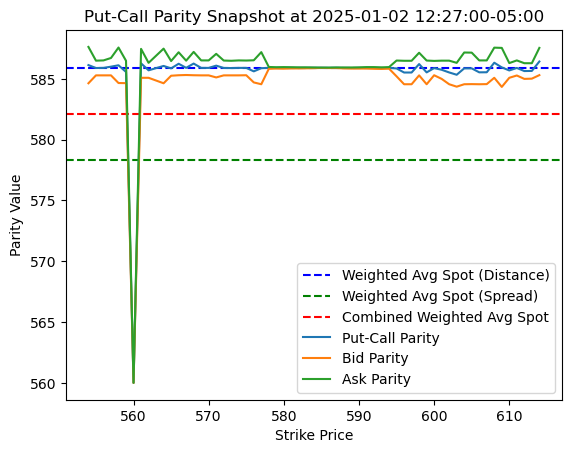

In [ ]:
import matplotlib.pyplot as plt
minute=df_parity["minute"].iloc[176]
parity_snapshot = df_parity[df_parity["minute"] == minute]
# Calculate the weighted average of the implied spot based on the distance from spot to strike
# Calculate the weighted average of the implied spot based on the distance from spot to strike
parity_snapshot["distance_weight"] = 1 / (abs(parity_snapshot["put_call_parity"] - parity_snapshot["strike"]) + 1e-6)
#weighted_avg_spot_distance = (parity_snapshot["put_call_parity"] * parity_snapshot["distance_weight"]).sum() / parity_snapshot["distance_weight"].sum()
weighted_avg_spot_distance = (parity_snapshot["put_call_parity"]).median()
# Calculate the weighted average of the implied spot based on the bid-ask spread
parity_snapshot["spread_weight"] = 1 / (parity_snapshot["ask_parity"] - parity_snapshot["bid_parity"])
weighted_avg_spot_spread = (parity_snapshot["put_call_parity"] * parity_snapshot["spread_weight"]).sum() / parity_snapshot["spread_weight"].sum()

# Combine the two weighted averages to get a better estimate of the implied spot
combined_weighted_avg_spot = (weighted_avg_spot_distance + weighted_avg_spot_spread) / 2
print(f"Weighted Average Spot (Distance): {weighted_avg_spot_distance}")
print(f"Weighted Average Spot (Spread): {weighted_avg_spot_spread}")
print(f"Combined Weighted Average Spot: {combined_weighted_avg_spot}")

# Add horizontal lines for the weighted averages
plt.axhline(y=weighted_avg_spot_distance, color='blue', linestyle='--', label='Weighted Avg Spot (Distance)')
plt.axhline(y=weighted_avg_spot_spread, color='green', linestyle='--', label='Weighted Avg Spot (Spread)')
plt.axhline(y=combined_weighted_avg_spot, color='red', linestyle='--', label='Combined Weighted Avg Spot')
parity_snapshot = df_parity[df_parity["minute"] == minute]

plt.plot(parity_snapshot["strike"], parity_snapshot["put_call_parity"], label="Put-Call Parity")
plt.plot(parity_snapshot["strike"], parity_snapshot["bid_parity"], label="Bid Parity")
plt.plot(parity_snapshot["strike"], parity_snapshot["ask_parity"], label="Ask Parity")
plt.xlabel("Strike Price")
plt.ylabel("Parity Value")
plt.title(f"Put-Call Parity Snapshot at {minute}")
plt.legend()
plt.show()

to do.
1. find weighted average of the implied spot based on the distance from spot to strike.
2. find the weighted average of the implied spot based on the bid ask spread
3. see if there is a way to combine the two weighted averages to get a better estimate of the implied spot.


In [10]:
def compute_implied_spot(df_parity):
    df_parity=copy.deepcopy(df_parity)
    # Calculate the weighted average of the implied spot based on the distance
    df_results = pd.DataFrame(columns=["minute", "weighted_avg_spot_distance", "weighted_avg_spot_spread", "combined_weighted_avg_spot"])

    for minute in (df_parity["minute"].unique()):
        parity_snapshot = df_parity[df_parity["minute"] == minute]
        # Calculate the weighted average of the implied spot based on the distance from spot to strike
        # Calculate the weighted average of the implied spot based on the distance from spot to strike
        parity_snapshot["distance_weight"] = 1 / (abs(parity_snapshot["put_call_parity"] - parity_snapshot["strike"]) + 1e-6)
        weighted_avg_spot_distance = (parity_snapshot["put_call_parity"] * parity_snapshot["distance_weight"]).sum() / parity_snapshot["distance_weight"].sum()
        weighted_avg_spot_distance = (parity_snapshot["put_call_parity"]).median()
        
        # Calculate the weighted average of the implied spot based on the bid-ask spread
        parity_snapshot["spread_weight"] = 1 / (parity_snapshot["ask_parity"] - parity_snapshot["bid_parity"])
        weighted_avg_spot_spread = (parity_snapshot["put_call_parity"] * parity_snapshot["spread_weight"]).sum() / parity_snapshot["spread_weight"].sum()

        # Combine the two weighted averages to get a better estimate of the implied spot
        combined_weighted_avg_spot = (weighted_avg_spot_distance + weighted_avg_spot_spread) / 2
        df_results = df_results.append({
            "minute": minute,
            "weighted_avg_spot_distance": weighted_avg_spot_distance,
            "weighted_avg_spot_spread": weighted_avg_spot_spread,
            "combined_weighted_avg_spot": combined_weighted_avg_spot
        }, ignore_index=True)
    return df_results


df_implied_spots=compute_implied_spot(df_parity)
df_implied_spots

/var/folders/c1/dv7w7b2x49j3spqsxnz6y_sw0000gn/T/ipykernel_63847/3542805795.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parity_snapshot["distance_weight"] = 1 / (abs(parity_snapshot["put_call_parity"] - parity_snapshot["strike"]) + 1e-6)
/var/folders/c1/dv7w7b2x49j3spqsxnz6y_sw0000gn/T/ipykernel_63847/3542805795.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parity_snapshot["spread_weight"] = 1 / (parity_snapshot["ask_parity"] - parity_snapshot["bid_parity"])
/var/folders/c1/dv7w7b2x49j3spqsx

,minute,weighted_avg_spot_distance,weighted_avg_spot_spread,combined_weighted_avg_spot
0,2025-01-02 09:30:00-05:00,589.4250,570.179498,579.802249
1,2025-01-02 09:31:00-05:00,589.4700,589.472257,589.471129
2,2025-01-02 09:32:00-05:00,589.5150,589.513118,589.514059
3,2025-01-02 09:33:00-05:00,589.1250,589.124600,589.124800
4,2025-01-02 09:34:00-05:00,588.0000,588.011701,588.005851
...,...,...,...,...
401,2025-01-02 16:14:00-05:00,584.8950,584.902616,584.898808
402,2025-01-02 10:38:00-05:00,587.2950,587.317265,587.306132
403,2025-01-02 12:28:00-05:00,585.0975,581.947354,583.522427
404,2025-01-02 13:16:00-05:00,581.4000,582.423536,581.911768


In [85]:
df_implied_spots
df
df2=pd.merge(df, df_implied_spots, on="minute")
df=df2


In [86]:
import pytz
from datetime import datetime

#df_combined_snapshots["minute"]
def create_4pm_datetime(localized_datetime):
    """
    Create a localized 4pm datetime on the same date as the input datetime.
    
    Parameters:
        localized_datetime (datetime): The input localized datetime.
    
    Returns:
        datetime: A localized datetime set to 4pm on the same date.
    """
    # Extract the date part of the input datetime
    date_part = localized_datetime.date()
    
    # Create a new datetime object for 4pm on the same date
    four_pm = datetime(date_part.year, date_part.month, date_part.day, 16, 17, 0)
    
    # Localize the new datetime object to the same timezone as the input datetime
    localized_four_pm = localized_datetime.tzinfo.localize(four_pm)
    
    return localized_four_pm

# Example usage
input_datetime = df_combined_snapshots["minute"].iloc[0]
localized_4pm = create_4pm_datetime(input_datetime)
print(localized_4pm)

2025-01-02 16:17:00-05:00


In [87]:
df_underlying = pd.read_csv("data/SPY_1m_2025-01-02.csv")
df_underlying["timestamp_est"] = pd.to_datetime(df_underlying["timestamp_est"])
df_underlying["minute"] = df_underlying["timestamp_est"].dt.floor("T")
df_result=pd.merge(df_combined_snapshots, df_underlying, on="minute", how="left")
df_result
df_underlying


,open_price,high_price,low_price,close_price,volume,vwap,timestamp,transactions,otc,timestamp_utc,timestamp_est,minute
0,588.220,589.070,588.12,588.80,2374.0,588.6085,1735808400000,73,NaN,2025-01-02 09:00:00+00:00,2025-01-02 04:00:00-05:00,2025-01-02 04:00:00-05:00
1,589.100,589.250,589.10,589.16,976.0,589.1589,1735808460000,17,NaN,2025-01-02 09:01:00+00:00,2025-01-02 04:01:00-05:00,2025-01-02 04:01:00-05:00
2,589.030,589.030,588.85,588.93,1018.0,588.9268,1735808520000,36,NaN,2025-01-02 09:02:00+00:00,2025-01-02 04:02:00-05:00,2025-01-02 04:02:00-05:00
3,588.900,588.900,588.90,588.90,441.0,588.8906,1735808580000,20,NaN,2025-01-02 09:03:00+00:00,2025-01-02 04:03:00-05:00,2025-01-02 04:03:00-05:00
4,589.000,589.000,589.00,589.00,924.0,589.0021,1735808640000,26,NaN,2025-01-02 09:04:00+00:00,2025-01-02 04:04:00-05:00,2025-01-02 04:04:00-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...
792,585.860,585.860,585.85,585.85,978.0,585.8524,1735865580000,13,NaN,2025-01-03 00:53:00+00:00,2025-01-02 19:53:00-05:00,2025-01-02 19:53:00-05:00
793,585.840,585.840,585.82,585.82,1468.0,585.8255,1735865640000,18,NaN,2025-01-03 00:54:00+00:00,2025-01-02 19:54:00-05:00,2025-01-02 19:54:00-05:00
794,585.829,585.829,585.80,585.81,1164.0,585.8229,1735865820000,14,NaN,2025-01-03 00:57:00+00:00,2025-01-02 19:57:00-05:00,2025-01-02 19:57:00-05:00
795,585.800,585.840,585.80,585.84,676.0,585.8131,1735865880000,17,NaN,2025-01-03 00:58:00+00:00,2025-01-02 19:58:00-05:00,2025-01-02 19:58:00-05:00


In [ ]:
df_combined_snapshotsp=pd.read_csv("combined_snapshots.csv")

In [92]:
df=df_result
df["texp"]=localized_4pm-df["minute"]
#df["texp_years"]=df_combined_snapshots["texp"].dt.total_seconds()/31557600
#df["texp_years"]=df_combined_snapshots["texp_years"]*(14.0/7.0)

df["texp_years"]=df["texp"].dt.total_seconds()/31557600
#df["texp_years"]=df["texp_years"]*(14.0/7.0)
def compute_implied_volatility(df,df_implied_spots):
    import py_vollib.black_scholes_merton.implied_volatility
    import py_vollib_vectorized
    df_internal=copy.deepcopy(df)
    df2=pd.merge(df_internal, df_implied_spots, on="minute")
    df=df2
    flag=df["option_type"].apply(lambda x: "c" if x=="C" else "p")
    strike=df["strike"]
    f=df["bid_price"]
    f_ask=df["best_ask_price"]
    s=df["close_price"]
    s=df["weighted_avg_spot_distance"]
    t=df["texp_years"]
    r=0.0000001
    bid_iv=py_vollib_vectorized.vectorized_implied_volatility(f, s, strike, t, r,flag)
    ask_iv=py_vollib_vectorized.vectorized_implied_volatility(f_ask, s, strike, t, r,flag)
    df["bid_iv"]=bid_iv
    df["ask_iv"]=ask_iv
    df["mid_iv"]=(df["bid_iv"]+df["ask_iv"])/2
    return df

df=compute_implied_volatility(df,df_implied_spots)


/Applications/anaconda3/envs/ml_env2/lib/python3.11/site-packages/py_vollib_vectorized/implied_volatility.py:75: UserWarning: Found Below Intrinsic contracts at index [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 

In [93]:
df.head()

,ticker,minute,bid_price,bid_size,bid_exchange,best_ask_price,best_ask_size,best_ask_exchange,underlying,expiration,...,timestamp_utc,timestamp_est,texp,texp_years,weighted_avg_spot_distance,weighted_avg_spot_spread,combined_weighted_avg_spot,bid_iv,ask_iv,mid_iv
0,O:SPY250102C00554000,2025-01-02 09:30:00-05:00,34.93,1,309,35.91,1,309,SPY,250102,...,2025-01-02 14:30:00+00:00,2025-01-02 09:30:00-05:00,0 days 06:47:00,0.000774,589.425,570.179498,579.802249,NaN,1.375649,NaN
1,O:SPY250102C00555000,2025-01-02 09:30:00-05:00,33.93,1,309,34.91,1,309,SPY,250102,...,2025-01-02 14:30:00+00:00,2025-01-02 09:30:00-05:00,0 days 06:47:00,0.000774,589.425,570.179498,579.802249,NaN,1.343566,NaN
2,O:SPY250102C00556000,2025-01-02 09:30:00-05:00,32.03,1,309,35.03,1,309,SPY,250102,...,2025-01-02 14:30:00+00:00,2025-01-02 09:30:00-05:00,0 days 06:47:00,0.000774,589.425,570.179498,579.802249,NaN,1.762646,NaN
3,O:SPY250102C00557000,2025-01-02 09:30:00-05:00,31.95,1,309,32.91,1,309,SPY,250102,...,2025-01-02 14:30:00+00:00,2025-01-02 09:30:00-05:00,0 days 06:47:00,0.000774,589.425,570.179498,579.802249,NaN,1.279190,NaN
4,O:SPY250102C00558000,2025-01-02 09:30:00-05:00,30.96,1,309,31.91,1,309,SPY,250102,...,2025-01-02 14:30:00+00:00,2025-01-02 09:30:00-05:00,0 days 06:47:00,0.000774,589.425,570.179498,579.802249,NaN,1.246887,NaN


/var/folders/c1/dv7w7b2x49j3spqsxnz6y_sw0000gn/T/ipykernel_63847/814457372.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ticker.sort_values(by="minute", inplace=True)


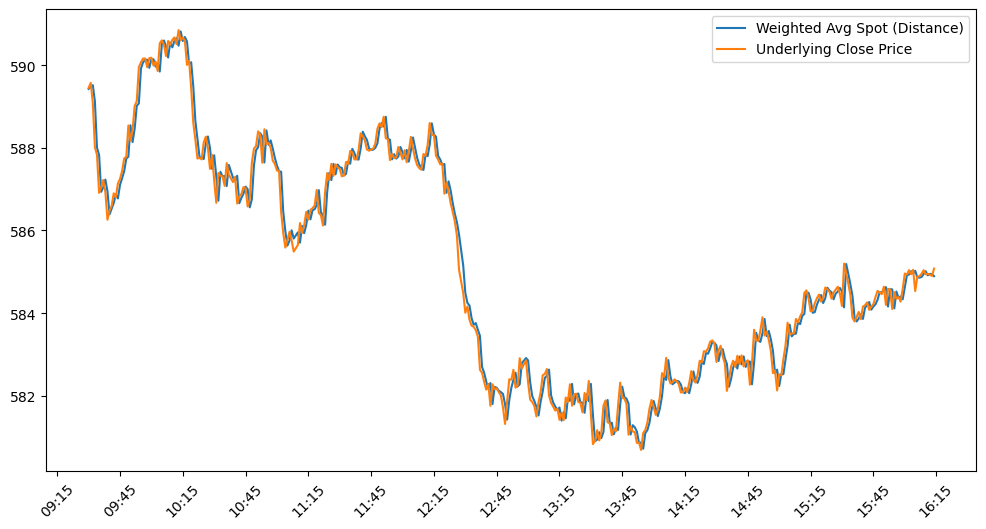

In [ ]:
all_tickers = df2["ticker"].unique()
ticker = all_tickers[6]

df_ticker = df2[df2["ticker"] == ticker]
df_ticker.sort_values(by="minute", inplace=True)

fig, ax = plt.subplots(figsize=(12, 6))
ax = plt.subplot(1, 1, 1)
ax.plot(df_ticker["minute"], df_ticker["weighted_avg_spot_distance"], label="Weighted Avg Spot (Distance)")
#ax.plot(df_ticker["minute"], df_ticker["weighted_avg_spot_spread"], label="Weighted Avg Spot (Spread)")
#ax.plot(df_ticker["minute"], df_ticker["combined_weighted_avg_spot"], label="Combined Weighted Avg Spot")
ax.plot(df_ticker["minute"], df_ticker["close_price"], label="Underlying Close Price")
ax.legend()    
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M", tz=df_ticker["minute"].dt.tz))
plt.xticks(rotation=45)
plt.show()


In [72]:
df_ticker[["minute","close_price"]].to_csv("df_ticker.csv", index=False)

In [95]:
df.head()

,ticker,minute,bid_price,bid_size,bid_exchange,best_ask_price,best_ask_size,best_ask_exchange,underlying,expiration,...,timestamp_utc,timestamp_est,texp,texp_years,weighted_avg_spot_distance,weighted_avg_spot_spread,combined_weighted_avg_spot,bid_iv,ask_iv,mid_iv
0,O:SPY250102C00554000,2025-01-02 09:30:00-05:00,34.93,1,309,35.91,1,309,SPY,250102,...,2025-01-02 14:30:00+00:00,2025-01-02 09:30:00-05:00,0 days 06:47:00,0.000774,589.425,570.179498,579.802249,NaN,1.375649,NaN
1,O:SPY250102C00555000,2025-01-02 09:30:00-05:00,33.93,1,309,34.91,1,309,SPY,250102,...,2025-01-02 14:30:00+00:00,2025-01-02 09:30:00-05:00,0 days 06:47:00,0.000774,589.425,570.179498,579.802249,NaN,1.343566,NaN
2,O:SPY250102C00556000,2025-01-02 09:30:00-05:00,32.03,1,309,35.03,1,309,SPY,250102,...,2025-01-02 14:30:00+00:00,2025-01-02 09:30:00-05:00,0 days 06:47:00,0.000774,589.425,570.179498,579.802249,NaN,1.762646,NaN
3,O:SPY250102C00557000,2025-01-02 09:30:00-05:00,31.95,1,309,32.91,1,309,SPY,250102,...,2025-01-02 14:30:00+00:00,2025-01-02 09:30:00-05:00,0 days 06:47:00,0.000774,589.425,570.179498,579.802249,NaN,1.279190,NaN
4,O:SPY250102C00558000,2025-01-02 09:30:00-05:00,30.96,1,309,31.91,1,309,SPY,250102,...,2025-01-02 14:30:00+00:00,2025-01-02 09:30:00-05:00,0 days 06:47:00,0.000774,589.425,570.179498,579.802249,NaN,1.246887,NaN


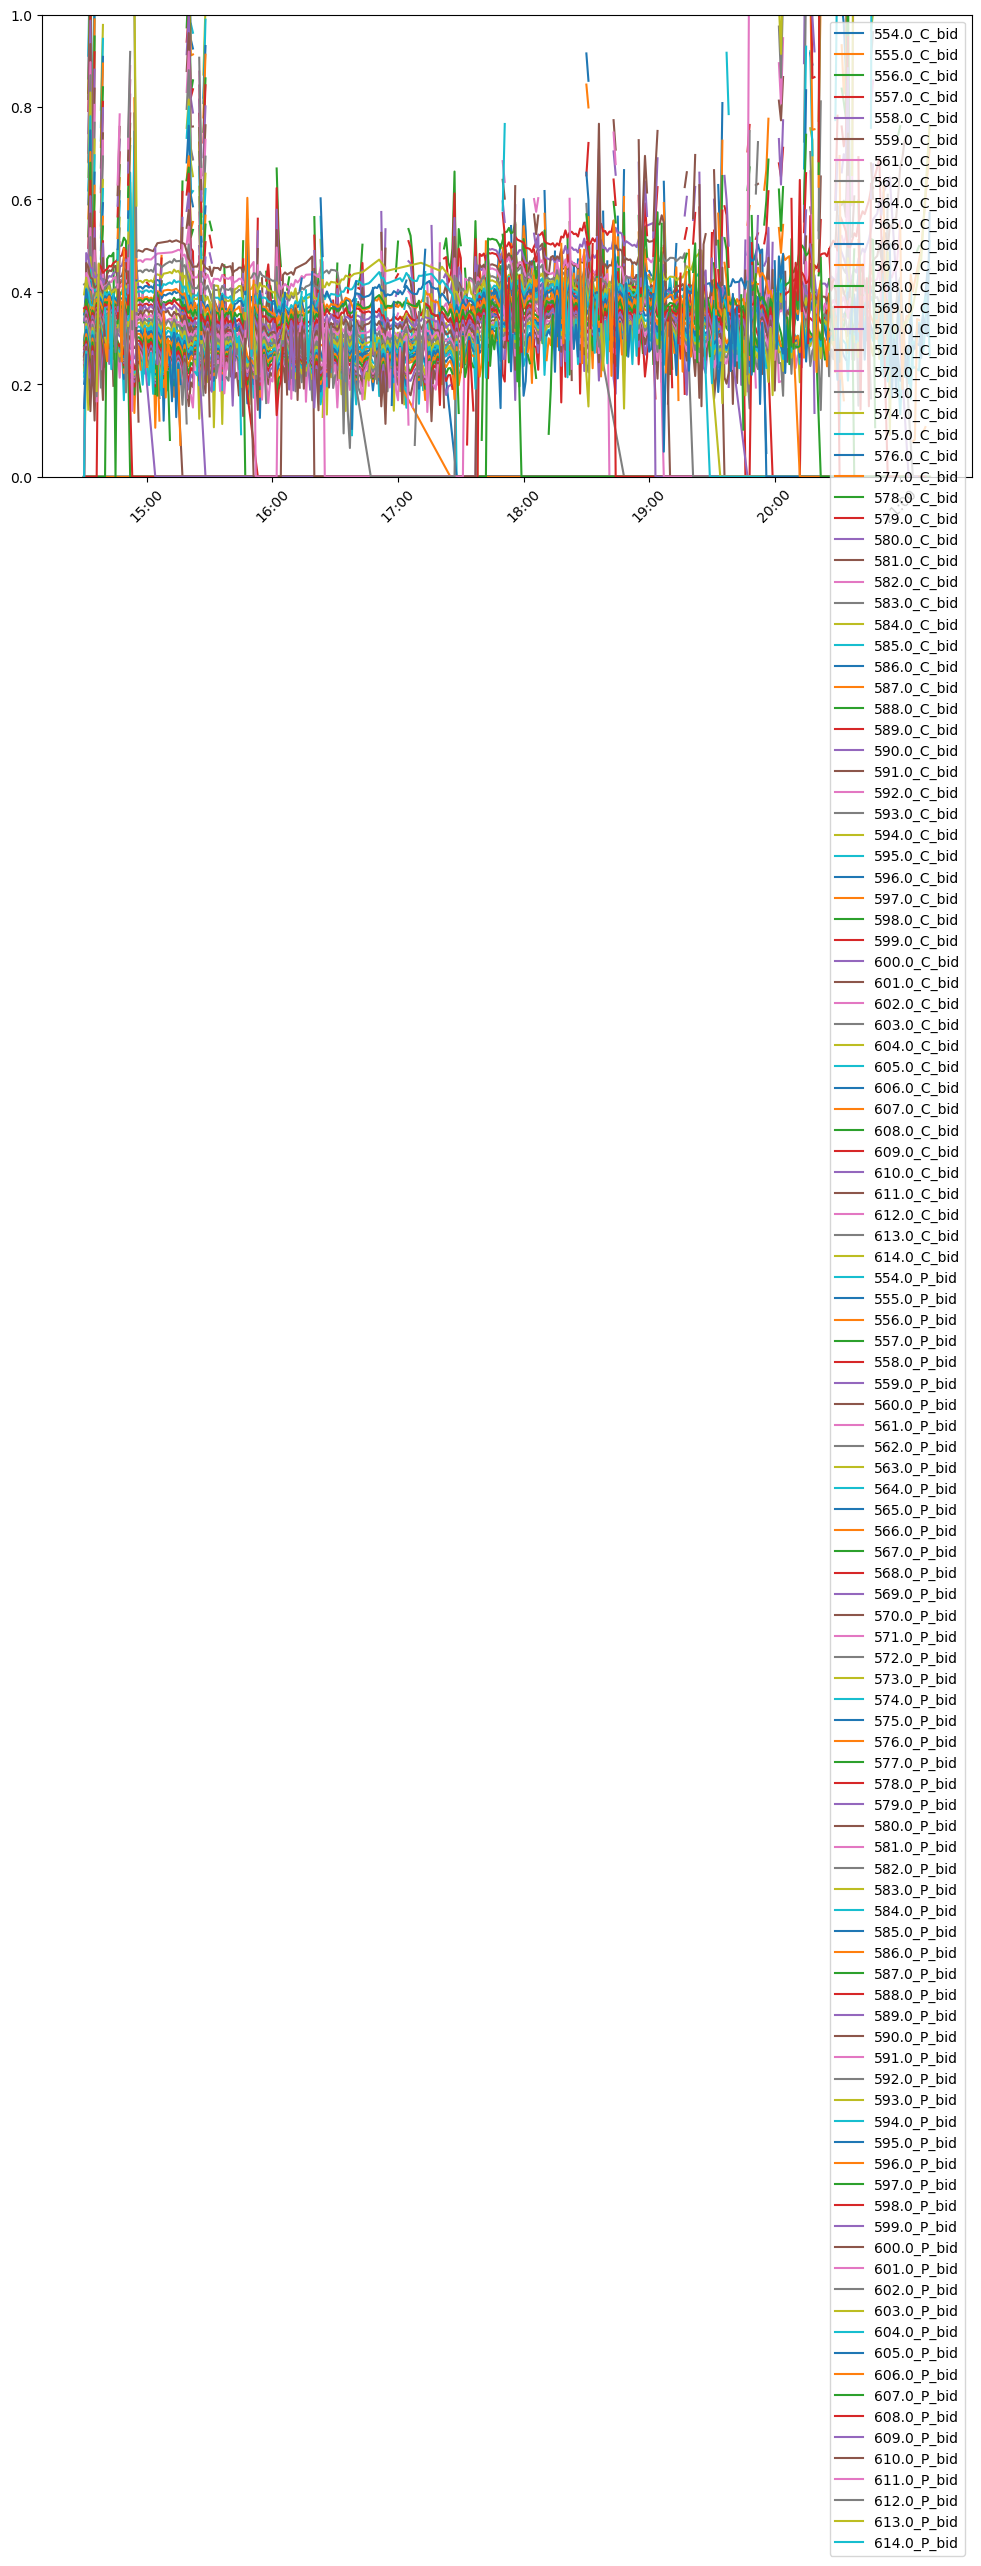

In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(12, 6))
minutes=df["minute"].unique()
tickers=df["ticker"].unique()
for ticker in tickers:
    df_ticker=df[df["ticker"]==ticker]
    strike=df_ticker["strike"].iloc[0]
    cp=df_ticker["option_type"].iloc[0]
    ax.plot(df_ticker["minute"], df_ticker["bid_iv"], label=f"{strike}_{cp}_bid")
    ax.set_ylim(0, 1)
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    plt.xticks(rotation=45) 

plt.legend()
plt.show()


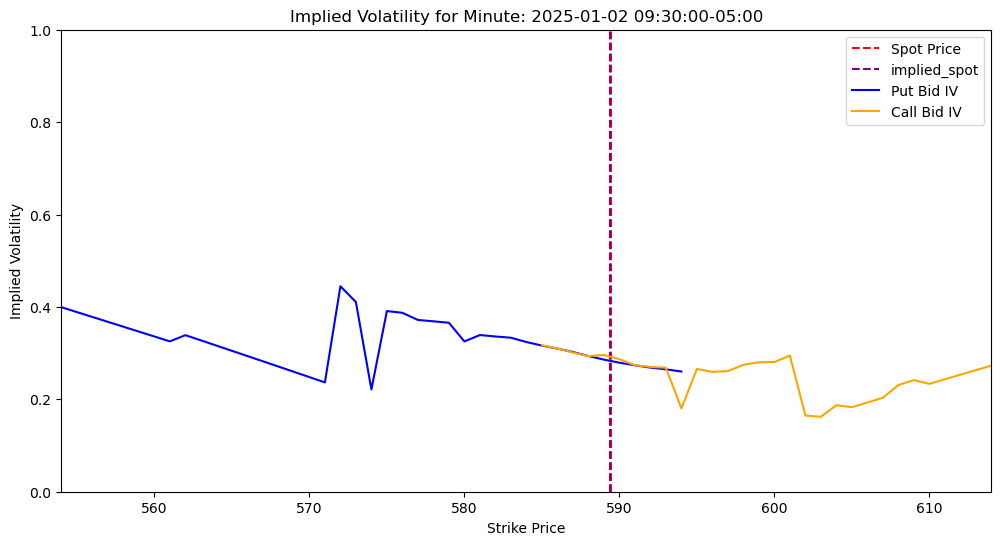

In [97]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.animation import FuncAnimation, PillowWriter

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Function to update the plot for each frame
def update(minute):
    ax.clear()
    df_minute = df[df["minute"] == minute]
    #implied_spot = df_results[df_results["minute"] == minute]["combined_weighted_avg_spot"].iloc[0]
    #df_minute=pd.merge(df_minute, df_implied_spots, on="minute")
    df_put = df_minute[df_minute["option_type"] == "P"]
    df_call = df_minute[df_minute["option_type"] == "C"]
    implied_spot_val = df_minute["weighted_avg_spot_distance"].iloc[0]
    spot_val = df_minute["close_price"].iloc[0]
    ax.axvline(x=spot_val, color='red', linestyle='--', label='Spot Price')
    ax.axvline(x=implied_spot_val, color='purple', linestyle='--', label='implied_spot')
    ax.plot(df_put["strike"], df_put["mid_iv"], label='Put Bid IV', color='blue')
    ax.plot(df_call["strike"], df_call["mid_iv"], label='Call Bid IV', color='orange')
    
    ax.set_ylim(0, 1)
    ax.set_xlim(df["strike"].min(), df["strike"].max())
    ax.set_xlabel('Strike Price')
    ax.set_ylabel('Implied Volatility')
    ax.set_title(f'Implied Volatility for Minute: {minute}')
    ax.legend()

# Create the animation
ani = FuncAnimation(fig, update, frames=sorted(minutes), repeat=False)

# Save the animation as a video file
ani.save("implied_volatility_animation.mp4", writer='ffmpeg', fps=2)

# Display the animation
from IPython.display import Video
Video("implied_volatility_animation.mp4")


In [16]:
minutes = sorted(minutes)

NameError: name 'minutes' is not defined

/var/folders/c1/dv7w7b2x49j3spqsxnz6y_sw0000gn/T/ipykernel_5177/3190386154.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(2, 1, 1)
/Applications/anaconda3/envs/ml_env2/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


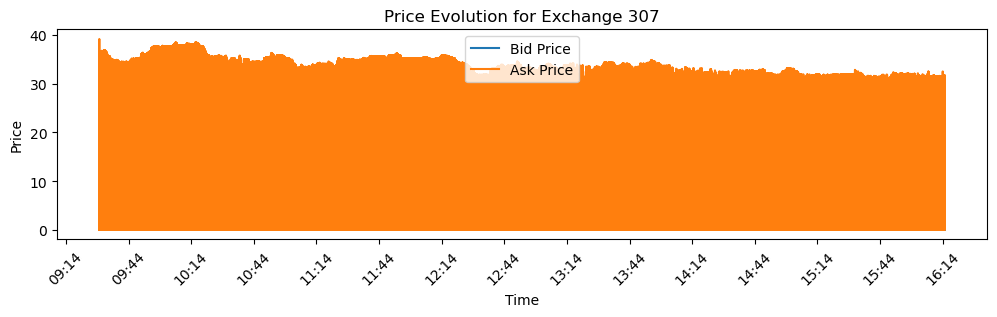

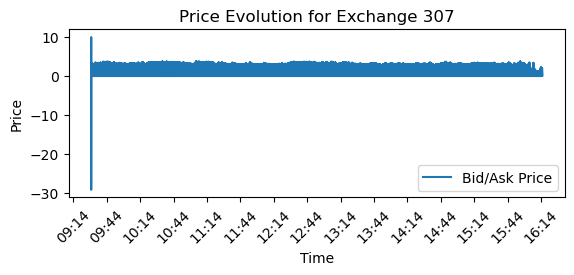

In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
bid_exchange=307
#temp=df_allq[df_allq["bid_exchange"]==bid_exchange]
temp=df_allq
temp_sorted=temp.sort_values(by="timestamp_est")
fig, ax = plt.subplots(figsize=(12, 6))
ax = plt.subplot(2, 1, 1)
ax.plot(temp_sorted["timestamp_est"], temp_sorted["bid_price"], label="Bid Price")
ax.plot(temp_sorted["timestamp_est"], temp_sorted["ask_price"], label="Ask Price")
#ax.plot(temp_sorted["timestamp_est"], temp_sorted["sequence_number"], label="Bid Price")
ax.set_xlabel("Time")
ax.set_ylabel("Price")
ax.set_title(f"Price Evolution for Exchange {bid_exchange}")
ax.legend()
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M", tz=temp_sorted["timestamp_est"].dt.tz))
plt.xticks(rotation=45)
plt.show()

ax = plt.subplot(2, 1, 2)
diff_bid_ask = temp_sorted["ask_price"] - temp_sorted["bid_price"]
ax.plot(temp_sorted["timestamp_est"], diff_bid_ask, label="Bid/Ask Price")
#ax.plot(temp_sorted["timestamp_est"], temp_sorted["sequence_number"], label="Bid Price")
ax.set_xlabel("Time")
ax.set_ylabel("Price")
ax.set_title(f"Price Evolution for Exchange {bid_exchange}")
ax.legend()
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M", tz=temp_sorted["timestamp_est"].dt.tz))
plt.xticks(rotation=45)
plt.show()

In [ ]:
import ipywidgets as widgets
from IPython.display import display

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#fig, ax = plt.subplots(figsize=(12, 6))

minutes=df["minute"].unique()
""""
for minute in minutes:
    df_minute=df[df["minute"]==minute]
    df_put=df_minute[df_minute["option_type"]=="P"]
    df_call = df_minute[df_minute["option_type"] == "C"]
    alpha = (minute - minutes.min()) / (minutes.max() - minutes.min())
    ax.plot(df_put["strike"], df_put["bid_iv"], alpha=alpha)
    #ax.plot(df_call["strike"], df_call["bid_iv"], alpha=alpha)
    #ax.plot(df_put["strike"], df_put["bid_iv"], label=f"{minute}_p_bid")
    #ax.plot(df_put["strike"], df_put["bid_iv"]) 
    ax.set_ylim(0, 1)
    #ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    #ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    #plt.xticks(rotation=45) 

plt.legend()
"""
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create a slider for selecting the minute
minute_slider = widgets.SelectionSlider(
    options=sorted(minutes),
    description='Minute:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='s'
)

# Function to update the plot based on the selected minute
def update_plot(minute):
    fig, ax = plt.subplots(figsize=(12, 6))
    df_minute = df[df["minute"] == minute]
    #df_minute=pd.merge(df_minute, df_implied_spots, on="minute")
    df_cboe_minute=df_cboe[df_cboe["minute"]==minute]
    df_cboe_minute=df_cboe_minute[df_cboe_minute["expiration"]=="2025-01-02"]
    df_put = df_minute[df_minute["option_type"] == "P"]
    df_call = df_minute[df_minute["option_type"] == "C"]
    df_cboe_put=df_cboe_minute[df_cboe_minute["option_type"]=="P"]
    df_cboe_call=df_cboe_minute[df_cboe_minute["option_type"]=="C"]

    spot_val = df_minute["close_price"].iloc[0]
    implied_spot_val = df_minute["weighted_avg_spot_distance"].iloc[0]
    ax.axvline(x=implied_spot_val, color='purple', linestyle='--', label='Implied Spot')
    ax.axvline(x=spot_val, color='red', linestyle='--', label='Spot Price')
    ax.plot(df_put["strike"], df_put["mid_iv"], label='Put Bid IV', color='blue')
    ax.plot(df_call["strike"], df_call["mid_iv"], label='Call Bid IV', color='orange')
    ax.plot(df_cboe_put["strike"], df_cboe_put["implied_volatility"], label='Put CBOE IV', color='green')
    ax.plot(df_cboe_call["strike"], df_cboe_call["implied_volatility"], label='Call CBOE IV', color='purple')
    
    ax.set_ylim(0, 1)
    ax.set_xlim(560,620)
    ax.set_xlabel('Strike Price')
    ax.set_ylabel('Implied Volatility')
    ax.set_title(f'Implied Volatility for Minute: {minute}')
    ax.legend()
    
    plt.show()

# Display the slider and the plot
interactive_plot = widgets.interactive(update_plot, minute=minute_slider)
display(interactive_plot)
display(minute_slider)

interactive(children=(SelectionSlider(continuous_update=False, description='Minute:', options=(Timestamp('2025…

SelectionSlider(continuous_update=False, description='Minute:', options=(Timestamp('2025-01-02 09:30:00-0500',…

In [28]:
minute_slider.value
df_cboe["minute"] = pd.to_datetime(df_cboe["quote_datetime"]).dt.tz_localize("US/Eastern").dt.tz_convert("US/Eastern")
df_cboe_minute=df_cboe[df_cboe["minute"]==minute_slider.value]
#minute_slider.value
df_cboe_minute_put=df_cboe_minute[df_cboe_minute["option_type"]=="P"]
df_cboe_minute_call=df_cboe_minute[df_cboe_minute["option_type"]=="C"]
df_cboe_minute2=df_cboe_minute[df_cboe_minute["expiration"]=="2025-01-02"]
df_cboe_minute2_put=df_cboe_minute2[df_cboe_minute2["option_type"]=="P"]
df_cboe_minute2_call=df_cboe_minute2[df_cboe_minute2["option_type"]=="C"]
df_cboe_minute2_put


,underlying_symbol,quote_datetime,root,expiration,strike,option_type,open,high,low,close,...,implied_underlying_price,active_underlying_price,implied_volatility,delta,gamma,theta,vega,rho,open_interest,minute


Timestamp('2025-01-02 11:00:00-0500', tz='pytz.FixedOffset(-300)')

In [24]:
df_cboe=pd.read_csv("data/UnderlyingOptionsIntervals_60sec_calcs_oi_2025-01-02.csv")

In [26]:
df

,strike,minute,ask_price_C,ask_price_P,ask_size_C,ask_size_P,bid_price_C,bid_price_P,bid_size_C,bid_size_P,...,ask_iv_P,delta_bid_C,delta_mid_C,delta_ask_C,delta_bid_P,delta_mid_P,delta_ask_P,dw_vol_bid,dw_vol_mid,dw_vol_ask
0,554.0,2025-01-02 09:31:00-05:00,35.96,0.01,1.0,3564.0,33.51,0.00,2.0,0.0,...,0.800418,NaN,NaN,0.948520,0.0,-0.001422,-0.002546,NaN,NaN,0.830556
1,555.0,2025-01-02 09:31:00-05:00,35.51,0.01,5.0,83.0,32.62,0.00,22.0,0.0,...,0.779309,NaN,NaN,0.914813,0.0,-0.001459,-0.002610,NaN,NaN,0.849880
2,556.0,2025-01-02 09:31:00-05:00,34.54,0.01,5.0,83.0,31.55,0.00,1.0,0.0,...,0.758191,NaN,NaN,0.911619,0.0,-0.001497,-0.002677,NaN,NaN,0.831088
3,557.0,2025-01-02 09:31:00-05:00,33.06,0.01,5.0,83.0,30.66,0.00,4.0,0.0,...,0.737061,NaN,NaN,0.938055,0.0,-0.001537,-0.002748,NaN,NaN,0.774491
4,558.0,2025-01-02 09:31:00-05:00,32.55,0.01,5.0,1824.0,29.63,0.00,4.0,0.0,...,0.715917,NaN,NaN,0.907479,0.0,-0.001580,-0.002823,NaN,NaN,0.789718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24583,611.0,2025-01-02 13:17:00-05:00,NaN,31.20,NaN,1.0,NaN,27.84,NaN,5.0,...,2.410332,NaN,NaN,NaN,NaN,-0.976867,-0.860717,NaN,NaN,NaN
24584,612.0,2025-01-02 13:17:00-05:00,NaN,32.20,NaN,1.0,NaN,28.84,NaN,5.0,...,2.464444,NaN,NaN,NaN,NaN,-0.977417,-0.863161,NaN,NaN,NaN
24585,613.0,2025-01-02 13:17:00-05:00,NaN,33.20,NaN,1.0,NaN,29.84,NaN,5.0,...,2.518147,NaN,NaN,NaN,NaN,-0.977938,-0.865497,NaN,NaN,NaN
24586,614.0,2025-01-02 13:17:00-05:00,NaN,34.20,NaN,1.0,NaN,30.84,NaN,5.0,...,2.571457,NaN,NaN,NaN,NaN,-0.978431,-0.867730,NaN,NaN,NaN


In [54]:
import pandas as pd
df=pd.read_csv("dw_implied_vols/dwvols_processed_merged_opt_1m_2025-01-02.csv")
df["minute"]=pd.to_datetime(df["minute"])
df=df[df["minute"]<minutes.max()]
minutes=df["minute"].unique()


In [37]:
minutes.max()
df=df[df["minute"]<minutes.max()]

In [92]:
from sklearn.linear_model import LinearRegression
import numpy as np

def fit_volatility_smile(group):
    vols = group[["minute", "strike", "dw_vol_bid", "dw_vol_ask", "dw_vol_mid", "weighted_implied_spot", "texp_years"]]
    vols = vols.dropna()
    spot = vols["weighted_implied_spot"].iloc[0]
    
    mnt=vols["minute"].iloc[0]
    #print(f"mnt={mnt}")
    #print("len(vols)=",len(vols))
    #input_datetime = vols["minute"].iloc[0]
    #localized_4pm = create_4pm_datetime(input_datetime)
    #texp = localized_4pm - input_datetime
    #texp_years = texp.total_seconds() / 31557600
    texp_years=vols["texp_years"].iloc[0]
    dist_from_spot = abs(vols["strike"] - spot)
    vols["dist_from_spot"] = dist_from_spot
    vols_atm = vols.nsmallest(2, "dist_from_spot")
    #print(f"vols_atm={vols_atm}")
    vols_atm["weight"] = (1 - vols_atm["dist_from_spot"]) / vols_atm["dist_from_spot"].sum()
    atm_vol = (vols_atm["dw_vol_mid"] * vols_atm["weight"]).sum()
    #print(f"atm_vol={atm_vol}")
    a_vols = vols["dw_vol_mid"]
    bid_vols = vols["dw_vol_bid"]
    ask_vols = vols["dw_vol_ask"]
    a_strikes = vols["strike"]

    log_strikes = np.log(a_strikes) - np.log(spot)
    model = LinearRegression(fit_intercept=True)
    model.fit(log_strikes.values.reshape(-1, 1), a_vols - atm_vol)
    model.intercept_ = atm_vol
    model.coef_ = model.coef_

    fitted_values = model.predict(log_strikes.values.reshape(-1, 1))
    fitted_values = fitted_values

    return pd.Series([model.coef_[0], model.intercept_, model.coef_[0]*np.sqrt(texp_years)/10], index=["slope", "atm_vol", "scaled_slope"])

# Apply the function to each minute group
df_grouped = df.groupby("minute").apply(fit_volatility_smile).reset_index()
#df_grouped.columns = ["minute", "model_coef", "model_intercept", "fitted_values"]
df_grouped
# Function to apply the fitted model to new data points
def apply_volatility_model(strikes, spot, atm_vol, slope, texp_years):
    log_strikes = np.log(strikes) - np.log(spot)
    fitted_vols = atm_vol + slope * log_strikes
    return fitted_vols

# Example usage
new_strikes = np.array([560, 570, 580, 590, 600])
spot = df["weighted_implied_spot"].iloc[0]
atm_vol = df_grouped["atm_vol"].iloc[0]
slope = df_grouped["slope"].iloc[0]
texp_years = df["texp_years"].iloc[0]

fitted_vols = apply_volatility_model(new_strikes, spot, atm_vol, slope, texp_years)
from scipy.optimize import curve_fit

def fit_quadratic_volatility_smile(group):
    vols = group[["minute", "strike", "dw_vol_mid", "weighted_implied_spot", "texp_years"]]
    vols = vols.dropna()
    spot = vols["weighted_implied_spot"].iloc[0]
    texp_years = vols["texp_years"].iloc[0]
    dist_from_spot = abs(vols["strike"] - spot)
    vols["dist_from_spot"] = dist_from_spot
    vols_atm = vols.nsmallest(2, "dist_from_spot")
    vols_atm["weight"] = (1 - vols_atm["dist_from_spot"]) / vols_atm["dist_from_spot"].sum()
    atm_vol = (vols_atm["dw_vol_mid"] * vols_atm["weight"]).sum()
    a_vols = vols["dw_vol_mid"]
    a_strikes = vols["strike"]
    log_strikes = np.log(a_strikes) - np.log(spot)

    # Define the model function
    def vol_model(log_moneyness, m, m2, atm_vol, t=1):
        return atm_vol + (m / np.sqrt(t)) * log_moneyness + m2 * log_moneyness**2

    alpha = 10000
    weights = np.exp(-alpha * log_strikes**2)
    popt, _ = curve_fit(lambda x, m, m2: vol_model(x, m, m2, atm_vol), log_strikes, a_vols, sigma=1/weights)
    #print(f"popt={popt}")
    #print(f"log_strikes={log_strikes}")
    #print(f"a_vols={a_vols}")
    m = popt[0]
    m2 = popt[1]

    return pd.Series([m, m2, atm_vol, m*np.sqrt(texp_years)/10,m2*texp_years], index=["slope", "quadratic_term", "atm_vol", "scaled_slope","scaled_quadratic"])

# Apply the function to each minute group
df_grouped_quadratic = df.groupby("minute").apply(fit_quadratic_volatility_smile).reset_index()
df_grouped_quadratic


df_grouped_quadratic

,minute,slope,quadratic_term,atm_vol,scaled_slope,scaled_quadratic
0,2025-01-02 09:31:00-05:00,-3.431804,155.058844,0.278401,-0.009535,0.119693
1,2025-01-02 09:32:00-05:00,-3.290406,138.986717,0.275317,-0.009131,0.107023
2,2025-01-02 09:33:00-05:00,-3.218171,135.567561,0.279928,-0.008919,0.104132
3,2025-01-02 09:34:00-05:00,-3.201534,98.851266,0.296730,-0.008862,0.075742
4,2025-01-02 09:35:00-05:00,-3.064704,78.918306,0.302890,-0.008473,0.060319
...,...,...,...,...,...,...
398,2025-01-02 16:09:00-05:00,-6.893161,14012.560557,0.289262,-0.002688,0.213135
399,2025-01-02 16:10:00-05:00,-8.657897,13874.941221,0.311331,-0.003159,0.184662
400,2025-01-02 16:11:00-05:00,1.052554,19432.162013,0.327665,0.000356,0.221677
401,2025-01-02 16:12:00-05:00,-1.349493,18500.623526,0.357009,-0.000416,0.175875


In [75]:
def apply_quadratic_volatility_model(strikes, spot, atm_vol, slope, quadratic_term, texp_years):
    """
    Apply the quadratic volatility model to new data points.
    
    Parameters:
        strikes (array-like): Array of strike prices.
        spot (float): Spot price.
        atm_vol (float): At-the-money volatility.
        slope (float): Slope of the linear term.
        quadratic_term (float): Coefficient of the quadratic term.
        texp_years (float): Time to expiration in years.
    
    Returns:
        array-like: Fitted volatilities for the given strikes.
    """
    log_strikes = np.log(strikes) - np.log(spot)
    fitted_vols = atm_vol + (slope / np.sqrt(texp_years)) * log_strikes + quadratic_term * log_strikes**2
    return fitted_vols

# Example usage
new_strikes = np.array([560, 570, 580, 590, 600])
spot = df["weighted_implied_spot"].iloc[0]
atm_vol = df_grouped_quadratic["atm_vol"].iloc[0]
slope = df_grouped_quadratic["slope"].iloc[0]
quadratic_term = df_grouped_quadratic["quadratic_term"].iloc[0]
texp_years = df["texp_years"].iloc[0]

fitted_vols = apply_quadratic_volatility_model(new_strikes, spot, atm_vol, slope, quadratic_term, texp_years)
print(fitted_vols)

[ 7.01939029  4.60028162  2.31787885  0.16590396 -1.86155099]


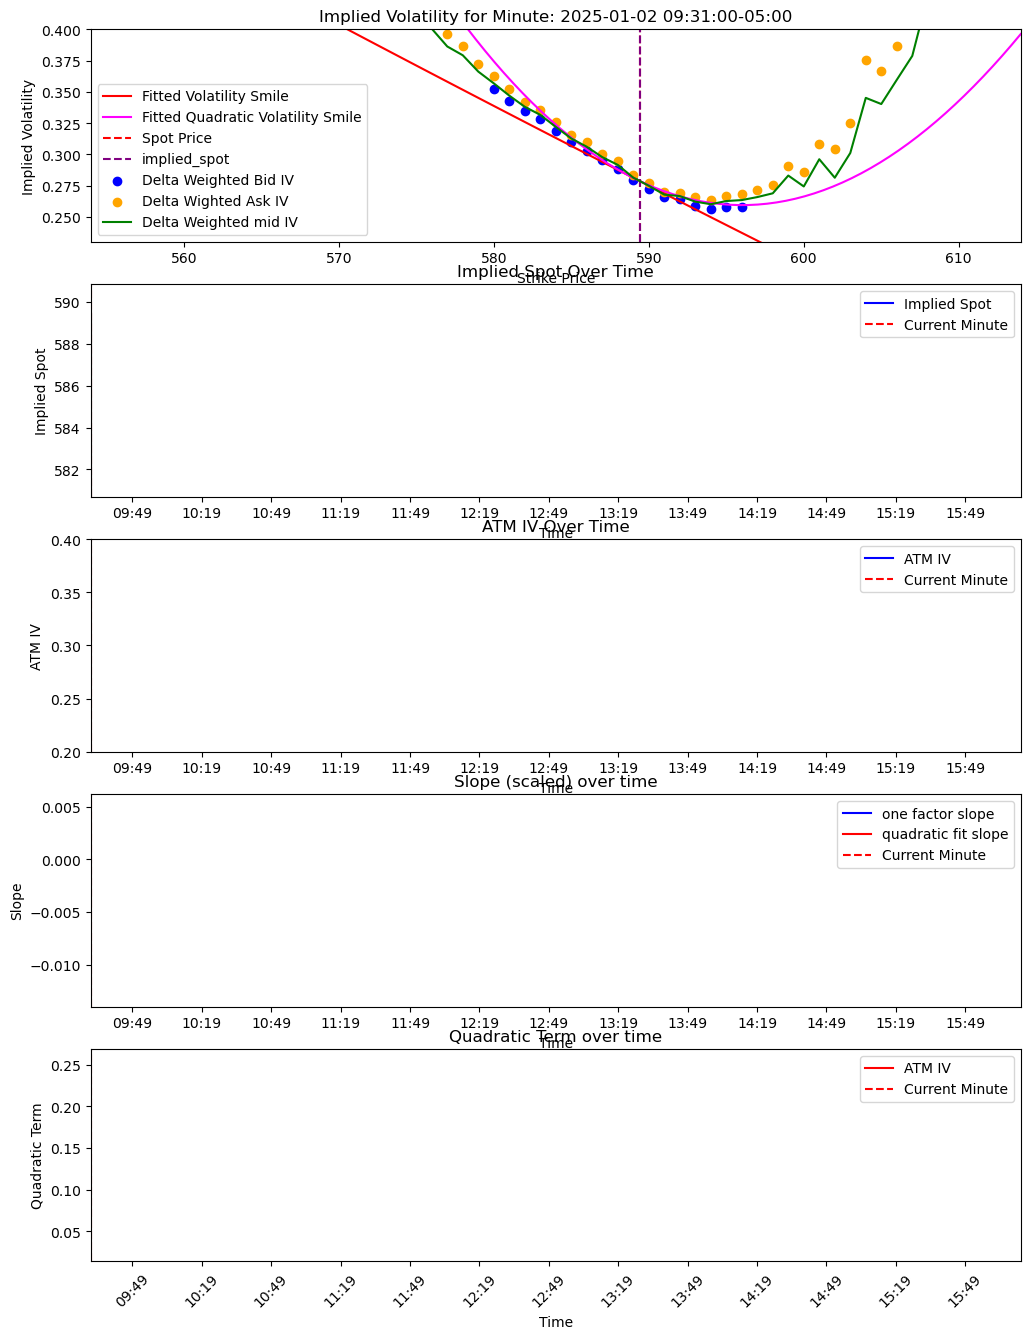

In [95]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.animation import FuncAnimation, PillowWriter


#df=df[df["minute"]<minutes.max()]
# Create a figure and axis
fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(5, 1, figsize=(12, 16))

# Function to update the plot for each frame
def update(minute):
    ax1.clear()
    df_minute = df[df["minute"] == minute]
    #implied_spot = df_results[df_results["minute"] == minute]["combined_weighted_avg_spot"].iloc[0]
    #df_minute=pd.merge(df_minute, df_implied_spots, on="minute")
    #f_put = df_minute[df_minute["option_type"] == "P"]
    #df_call = df_minute[df_minute["option_type"] == "C"]

    implied_spot_val = df_minute["weighted_implied_spot"].iloc[0]

    params=df_grouped[df_grouped["minute"]==minute]
    params_quadratic=df_grouped_quadratic[df_grouped_quadratic["minute"]==minute]

    spot = df_minute["weighted_implied_spot"].iloc[0]
    atm_vol = params["atm_vol"].iloc[0]
    slope = params["slope"].iloc[0]
    texp_years = df_minute["texp_years"].iloc[0]
    new_strikes = np.linspace(df_minute["strike"].min(), df_minute["strike"].max(), 100)
    fitted_vols = apply_volatility_model(new_strikes, spot, atm_vol, slope, texp_years)
    fitted_vols_quadratic = apply_quadratic_volatility_model(new_strikes, spot, atm_vol, params_quadratic["slope"].iloc[0], params_quadratic["quadratic_term"].iloc[0], 1)

    ax1.plot(new_strikes, fitted_vols, label='Fitted Volatility Smile', color='red')
    ax1.plot(new_strikes, fitted_vols_quadratic, label='Fitted Quadratic Volatility Smile', color='magenta')

    #spot_val = df_minute["close_price"].iloc[0]
    ax1.axvline(x=implied_spot_val, color='red', linestyle='--', label='Spot Price')
    ax1.axvline(x=implied_spot_val, color='purple', linestyle='--', label='implied_spot')
    ax1.scatter(df_minute["strike"], df_minute["dw_vol_bid"], label='Delta Weighted Bid IV', color='blue', marker='o')
    ax1.scatter(df_minute["strike"], df_minute["dw_vol_ask"], label='Delta Wighted Ask IV', color='orange', marker='o')
    ax1.plot(df_minute["strike"], df_minute["dw_vol_mid"], label='Delta Weighted mid IV', color='green')
    
    ax1.set_ylim(.23, .4)
    ax1.set_xlim(df["strike"].min(), df["strike"].max())
    ax1.set_xlabel('Strike Price')
    ax1.set_ylabel('Implied Volatility')
    ax1.set_title(f'Implied Volatility for Minute: {minute}')
    ax1.legend()
    ax2.clear()
    df_up_to_minute = df[df["minute"] <= minute]
    df_up_to_minute = df_up_to_minute.drop_duplicates(subset="minute", keep="last")
    df_up_to_minute = df_up_to_minute.sort_values(by="minute")
    ax2.plot(df_up_to_minute["minute"], df_up_to_minute["weighted_implied_spot"], label='Implied Spot', color='blue')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Implied Spot')
    ax2.set_title('Implied Spot Over Time')
    ax2.set_xlim(df["minute"].min(), df["minute"].max())
    ax2.axvline(x=minute, color='red', linestyle='--', label='Current Minute')
    ax2.fill_between(df_up_to_minute["minute"], df_up_to_minute["weighted_implied_spot"], color='lightgray', where=(df_up_to_minute["minute"] <= minute))
    ax2.set_ylim(df["weighted_implied_spot"].min(), df["weighted_implied_spot"].max())
    #ax2.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    #ax2.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    
    ax2.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
    ax2.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M", tz=df_up_to_minute["minute"].dt.tz))
    plt.xticks(rotation=45)
    ax2.legend()

    #df_atm_vol = df[df["minute"] <= minute]
    df_atm_vol=df_grouped[df_grouped["minute"]<minute][["minute","atm_vol","scaled_slope"]].dropna()
    df_atm_vol_quadratic=df_grouped_quadratic[df_grouped_quadratic["minute"]<minute][["minute","atm_vol","scaled_slope","scaled_quadratic"]].dropna()

    df_atm_vol = df_atm_vol[np.isfinite(df_atm_vol["atm_vol"])]

    ax3.clear()

    ax3.plot(df_atm_vol["minute"], df_atm_vol["atm_vol"], label='ATM IV', color='blue')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('ATM IV')
    ax3.set_title('ATM IV Over Time')
    ax3.set_xlim(df["minute"].min(), df["minute"].max())
    ax3.axvline(x=minute, color='red', linestyle='--', label='Current Minute')
    
    #df_atm_vol = df_atm_vol[np.isfinite(df_atm_vol["atm_vol"].astype(float))]
    #ax3.fill_between(df_atm_vol["minute"], df_atm_vol["atm_vol"], color='lightgray', where=(df_atm_vol["minute"] <= minute))
    ax3.set_ylim(.2, .4)
    #ax2.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    #ax2.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))  
    ax3.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
    ax3.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M", tz=df_atm_vol["minute"].dt.tz))
    plt.xticks(rotation=45)
    ax3.legend()

   
    ax4.clear()



    ax4.plot(df_atm_vol["minute"], df_atm_vol["scaled_slope"], label='one factor slope', color='blue')
    ax4.plot(df_atm_vol_quadratic["minute"], df_atm_vol_quadratic["scaled_slope"], label='quadratic fit slope', color='red')
    ax4.set_xlabel('Time')
    ax4.set_ylabel('Slope')
    ax4.set_title('Slope (scaled) over time')
    ax4.set_xlim(df["minute"].min(), df["minute"].max())
    ax4.axvline(x=minute, color='red', linestyle='--', label='Current Minute')
    
    #df_atm_vol = df_atm_vol[np.isfinite(df_atm_vol["atm_vol"].astype(float))]
    #ax3.fill_between(df_atm_vol["minute"], df_atm_vol["atm_vol"], color='lightgray', where=(df_atm_vol["minute"] <= minute))
    #ax4.set_ylim(.2, .6)
    #ax2.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    #ax2.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))  
    ax4.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
    ax4.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M", tz=df_atm_vol["minute"].dt.tz))
    plt.xticks(rotation=45)
    ax4.legend()
 

    ax5.clear()



    ax5.plot(df_atm_vol_quadratic["minute"], df_atm_vol_quadratic["scaled_quadratic"], label='ATM IV', color='red')
    ax5.set_xlabel('Time')
    ax5.set_ylabel('Quadratic Term')
    ax5.set_title('Quadratic Term over time')
    ax5.set_xlim(df["minute"].min(), df["minute"].max())
    ax5.axvline(x=minute, color='red', linestyle='--', label='Current Minute')
    
    #df_atm_vol = df_atm_vol[np.isfinite(df_atm_vol["atm_vol"].astype(float))]
    #ax3.fill_between(df_atm_vol["minute"], df_atm_vol["atm_vol"], color='lightgray', where=(df_atm_vol["minute"] <= minute))
    #ax4.set_ylim(.2, .6)
    #ax2.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    #ax2.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))  
    ax5.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
    ax5.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M", tz=df_atm_vol["minute"].dt.tz))
    plt.xticks(rotation=45)
    ax5.legend()
 

# Create the animation
ani = FuncAnimation(fig, update, frames=sorted(minutes), repeat=False)

# Save the animation as a video file
ani.save("implied_volatility_animation3.mp4", writer='ffmpeg', fps=8)

# Display the animation
from IPython.display import Video
Video("implied_volatility_animation3.mp4")

In [4]:
df

,strike,minute,ask_price_C,ask_price_P,ask_size_C,ask_size_P,bid_price_C,bid_price_P,bid_size_C,bid_size_P,...,ask_iv_P,delta_bid_C,delta_mid_C,delta_ask_C,delta_bid_P,delta_mid_P,delta_ask_P,dw_vol_bid,dw_vol_mid,dw_vol_ask
0,554.0,2025-01-02 09:31:00-05:00,35.96,0.01,1.0,3564.0,33.51,0.00,2.0,0.0,...,0.800418,NaN,NaN,0.948520,0.0,-0.001422,-0.002546,NaN,NaN,0.830556
1,555.0,2025-01-02 09:31:00-05:00,35.51,0.01,5.0,83.0,32.62,0.00,22.0,0.0,...,0.779309,NaN,NaN,0.914813,0.0,-0.001459,-0.002610,NaN,NaN,0.849880
2,556.0,2025-01-02 09:31:00-05:00,34.54,0.01,5.0,83.0,31.55,0.00,1.0,0.0,...,0.758191,NaN,NaN,0.911619,0.0,-0.001497,-0.002677,NaN,NaN,0.831088
3,557.0,2025-01-02 09:31:00-05:00,33.06,0.01,5.0,83.0,30.66,0.00,4.0,0.0,...,0.737061,NaN,NaN,0.938055,0.0,-0.001537,-0.002748,NaN,NaN,0.774491
4,558.0,2025-01-02 09:31:00-05:00,32.55,0.01,5.0,1824.0,29.63,0.00,4.0,0.0,...,0.715917,NaN,NaN,0.907479,0.0,-0.001580,-0.002823,NaN,NaN,0.789718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24583,611.0,2025-01-02 13:17:00-05:00,NaN,31.20,NaN,1.0,NaN,27.84,NaN,5.0,...,2.410332,NaN,NaN,NaN,NaN,-0.976867,-0.860717,NaN,NaN,NaN
24584,612.0,2025-01-02 13:17:00-05:00,NaN,32.20,NaN,1.0,NaN,28.84,NaN,5.0,...,2.464444,NaN,NaN,NaN,NaN,-0.977417,-0.863161,NaN,NaN,NaN
24585,613.0,2025-01-02 13:17:00-05:00,NaN,33.20,NaN,1.0,NaN,29.84,NaN,5.0,...,2.518147,NaN,NaN,NaN,NaN,-0.977938,-0.865497,NaN,NaN,NaN
24586,614.0,2025-01-02 13:17:00-05:00,NaN,34.20,NaN,1.0,NaN,30.84,NaN,5.0,...,2.571457,NaN,NaN,NaN,NaN,-0.978431,-0.867730,NaN,NaN,NaN
